# ML Project on Labour Analysis - Prepr

# Canada Employment and Labour

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading the datasets using Pandas DataFrames

In [86]:
# dataset containing labour force based on age and sex
agesex_pd = pd.read_csv("labour_agesex.csv")

# dataset containing labour force based on industries of work force
indus_pd = pd.read_csv("labour_industry.csv")

agesex_pd.shape, indus_pd.shape

((66, 64), (28, 63))

In [87]:
# displaying first 2 rows in the age-sex labour force
agesex_pd.head(2)

Sex          Age group     Jan-15     Feb-15     Mar-15     Apr-15  \
0  Both sexes  15 years and over  17,540.00  17,582.00  17,574.00  17,697.90   
1  Both sexes     15 to 24 years   2,318.60   2,324.00   2,329.60   2,335.70   

      May-15     Jun-15     Jul-15     Aug-15    ...         May-19  \
0  18,110.50  18,314.60  18,240.30  18,228.80    ...      19,237.90   
1   2,560.80   2,676.30   2,816.50   2,778.40    ...       2,601.90   

      Jun-19     Jul-19     Aug-19     Sep-19     Oct-19     Nov-19  \
0  19,392.90  19,283.80  19,317.90  19,248.80  19,238.80  19,103.30   
1   2,708.10   2,849.30   2,845.30   2,447.50   2,461.10   2,444.90   

      Dec-19     Jan-20     Feb-20  
0  19,096.40  18,838.60  18,917.10  
1   2,446.00   2,359.50   2,398.10  

[2 rows x 64 columns]

In [88]:
# displaying first 2 rows in the industries labour force
indus_pd.head(2)

North American Industry Classification System (NAICS)3     Jan-15  \
0                            Total, all industries 5      17,540.00   
1                           Goods-producing sector 6       3,726.20   

      Feb-15     Mar-15     Apr-15     May-15     Jun-15     Jul-15  \
0  17,582.00  17,574.00  17,697.90  18,110.50  18,314.60  18,240.30   
1   3,691.60   3,669.70   3,741.40   3,912.50   4,001.80   4,031.90   

      Aug-15     Sep-15    ...         May-19     Jun-19     Jul-19  \
0  18,228.80  18,068.70    ...      19,237.90  19,392.90  19,283.80   
1   4,047.10   3,965.80    ...       4,029.80   4,068.70   4,108.10   

      Aug-19     Sep-19     Oct-19     Nov-19     Dec-19     Jan-20     Feb-20  
0  19,317.90  19,248.80  19,238.80  19,103.30  19,096.40  18,838.60  18,917.10  
1   4,119.90   4,068.40   4,013.40   3,951.70   3,902.30   3,799.80   3,810.00  

[2 rows x 63 columns]

# 2. Cleaning each Dataset and Problem Discussion

In [ ]:
'''
DATA CLEANING PROBLEMS:
1. All columns or rows contain string data of object form, so convert to integers to analyse with dataframe functions
2. Numerical values need to be cleaned as ',' between them causes string data type to persist
'''

In [136]:
# class to clean datasets
class clean(object):
    
    # initialse required data
    def __init__(self, df):
        self.cur_df = df
        print("Data frame successfully loaded!!")
        
    
    # convert datatype of dataframes
    def conv_type(self, df, datatype, start=0, disp=False):
        # datatype: type of data to convert each dataframe
        # start: beginning of data to be converted
        # disp: print results or not
        new_df = df.iloc[:, :start]
        
        for i in range(start, df.shape[1]):
            new_df[df.columns.values[i]] = df[df.columns.values[i]].astype(datatype)
        
        if disp==True:
            print("Datatype has been changed to: ", datatype)
            print(new_df.dtypes)
            
        return new_df
    
    
    # remove noise from data (in this case, removing ',' from numerical values)
    def rem_noise(self, remval="", disp=False):
        # remval: value to be removed (in this case it will be ',')
        
        # creating a copy of the dataframe to be modified
        new_df = self.cur_df.copy()
        
        # iterating through the dataframe
        for i in range(self.cur_df.shape[0]):
            for j in range(self.cur_df.shape[1]):
                strval = self.cur_df.iloc[i, j]
                newstr = ""
                
                if remval in strval:
                    for ch in strval:
                        if ch != remval:
                            newstr = newstr + ch
                    new_df.iloc[i, j] = newstr
                
                else:
                    new_df.iloc[i, j] = self.cur_df.iloc[i, j]
                    continue
                    
        if disp == True:
            print("The modified dataframe is: ")
            print(new_df.head())
            
        return new_df

In [140]:
# clean object for agesex labour force data
clean_agesex = clean(agesex_pd)

# removing "," from the dataframe to deal with changing the datatype
remnoise_agesex = clean_agesex.rem_noise(",", True)

# changing the datatype of the cleaned dataframe
convtype_agesex = clean_agesex.conv_type(remnoise_agesex, "float", 2)
convtype_agesex.dtypes[:10]

Data frame successfully loaded!!
The modified dataframe is: 
          Sex          Age group    Jan-15    Feb-15    Mar-15    Apr-15  \
0  Both sexes  15 years and over  17540.00  17582.00  17574.00  17697.90   
1  Both sexes     15 to 24 years   2318.60   2324.00   2329.60   2335.70   
2  Both sexes  25 years and over  15221.30  15258.00  15244.40  15362.30   
3  Both sexes     25 to 44 years   7627.20   7618.30   7590.80   7667.10   
4  Both sexes     45 to 64 years   6908.30   6960.30   6985.50   7009.60   

     May-15    Jun-15    Jul-15    Aug-15    ...       May-19    Jun-19  \
0  18110.50  18314.60  18240.30  18228.80    ...     19237.90  19392.90   
1   2560.80   2676.30   2816.50   2778.40    ...      2601.90   2708.10   
2  15549.60  15638.30  15423.70  15450.40    ...     16636.00  16684.80   
3   7775.20   7806.50   7716.80   7733.50    ...      8421.50   8452.90   
4   7082.70   7131.80   7026.20   7018.80    ...      7302.30   7330.70   

     Jul-19    Aug-19    Sep-19

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Sex           object
Age group     object
Jan-15       float64
Feb-15       float64
Mar-15       float64
Apr-15       float64
May-15       float64
Jun-15       float64
Jul-15       float64
Aug-15       float64
dtype: object

In [141]:
# clean object for industry labour force data
clean_indus = clean(indus_pd)

# removing "," from the dataframe to deal with changing the datatype
remnoise_indus = clean_indus.rem_noise(",", True)

# changing the datatype of the cleaned dataframe
convtype_indus = clean_indus.conv_type(remnoise_indus, "float", 1)
convtype_indus.dtypes[:10]

Data frame successfully loaded!!
The modified dataframe is: 
  North American Industry Classification System (NAICS)3    Jan-15    Feb-15  \
0                             Total all industries 5      17540.00  17582.00   
1                           Goods-producing sector 6       3726.20   3691.60   
2                                      Agriculture 7         279.2     280.2   
3  Forestry fishing mining quarrying oil and gas 8 9         356.8     341.5   
4  Forestry and logging and support activities fo...            48      44.7   

     Mar-15    Apr-15    May-15    Jun-15    Jul-15    Aug-15    Sep-15  \
0  17574.00  17697.90  18110.50  18314.60  18240.30  18228.80  18068.70   
1   3669.70   3741.40   3912.50   4001.80   4031.90   4047.10   3965.80   
2     278.3     289.1     303.9     300.2       311     311.3     307.8   
3     339.6     339.6     357.1     374.3     370.5     374.3     361.2   
4      43.1        41      48.8      53.1      54.1      55.7      52.7   

     ..

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


North American Industry Classification System (NAICS)3     object
Jan-15                                                    float64
Feb-15                                                    float64
Mar-15                                                    float64
Apr-15                                                    float64
May-15                                                    float64
Jun-15                                                    float64
Jul-15                                                    float64
Aug-15                                                    float64
Sep-15                                                    float64
dtype: object

In [142]:
# adjusting the naming of the cleaned data to be used in the next stage
cleaned_agesex = convtype_agesex.copy()
cleaned_indus = convtype_indus.copy()

# 3. Analyse each Dataset after Cleaning

In [158]:
# class to analyse datasets
class analyse(object):
    
    # initialse required data
    def __init__(self, df):
        self.cur_df = df.copy()
        print("Data frame successfully loaded!!")
    
    # returns and prints shape of dataframe
    def df_shape(self, disp=False):
        # disp: print results or not
        df_sh = self.cur_df.shape
        
        if disp == True:
            print("Shape of df: ", self.cur_df.shape)
        
        return df_sh
    
    
    # returns and prints top rows of dataframe
    def df_head(self, length=5, disp=False):
        # length: how many rows to display, default is 5
        # disp: print results or not
        #df_h = self.cur_df.head(length)
        
        if disp == True:
            print("First ", length, " rows returned: ")
            print(self.cur_df.head(length))
            
        return self.cur_df.head(length)
    
    
    # returns and prints bottom rows of dataframe
    def df_tail(self, length=5, disp=False):
        # length: how many rows to display, default is 5
        # disp: print results or not
        df_t = self.cur_df.tail(length)
        
        if disp == True:
            print("Last ", length, " rows returned: ")
            print(df_t)
            
        return df_t
    
    
    # returns and prints description of dataframe
    def df_description(self, disp=False):
        # disp: print results or not
        df_desc = self.cur_df.describe()
        
        if disp == True:
            print("Data frame description: ")
            print(df_desc)
            
        return df_desc
    
    
    # returns and prints correlation matrix of dataframe
    def df_correlation(self, disp=False):
        # disp: print results or not
        df_corr = self.cur_df.corr()
        
        if disp == True:
            print("Data frame correlations: ")
            print(df_corr)
            
        return df_corr
    
    
    # run all the functions instead of one at a time
    def run_all(self, length=5, disp=False):
        shape_vals = self.df_shape(disp)
        head_vals = self.df_head(length, disp)
        tail_vals = self.df_tail(length, disp)
        desc_vals = self.df_description(disp)
        corr_vals = self.df_correlation(disp)
        print("****************************\n")

In [161]:
# analysing the cleaned dataset of the labour force based on the age and sex
analyse_agesex = analyse(cleaned_agesex)
analyse_agesex.run_all(disp=True)

Data frame successfully loaded!!
Shape of df:  (66, 64)
First  5  rows returned: 
          Sex          Age group   Jan-15   Feb-15   Mar-15   Apr-15   May-15  \
0  Both sexes  15 years and over  17540.0  17582.0  17574.0  17697.9  18110.5   
1  Both sexes     15 to 24 years   2318.6   2324.0   2329.6   2335.7   2560.8   
2  Both sexes  25 years and over  15221.3  15258.0  15244.4  15362.3  15549.6   
3  Both sexes     25 to 44 years   7627.2   7618.3   7590.8   7667.1   7775.2   
4  Both sexes     45 to 64 years   6908.3   6960.3   6985.5   7009.6   7082.7   

    Jun-15   Jul-15   Aug-15   ...      May-19   Jun-19   Jul-19   Aug-19  \
0  18314.6  18240.3  18228.8   ...     19237.9  19392.9  19283.8  19317.9   
1   2676.3   2816.5   2778.4   ...      2601.9   2708.1   2849.3   2845.3   
2  15638.3  15423.7  15450.4   ...     16636.0  16684.8  16434.5  16472.6   
3   7806.5   7716.8   7733.5   ...      8421.5   8452.9   8334.0   8351.3   
4   7131.8   7026.2   7018.8   ...      7302.3

In [162]:
# analysing the cleaned dataset of the labour force based on the industry
analyse_indus = analyse(cleaned_indus)
analyse_indus.run_all(disp=True)

Data frame successfully loaded!!
Shape of df:  (28, 63)
First  5  rows returned: 
  North American Industry Classification System (NAICS)3   Jan-15   Feb-15  \
0                             Total all industries 5      17540.0  17582.0   
1                           Goods-producing sector 6       3726.2   3691.6   
2                                      Agriculture 7        279.2    280.2   
3  Forestry fishing mining quarrying oil and gas 8 9        356.8    341.5   
4  Forestry and logging and support activities fo...         48.0     44.7   

    Mar-15   Apr-15   May-15   Jun-15   Jul-15   Aug-15   Sep-15   ...     \
0  17574.0  17697.9  18110.5  18314.6  18240.3  18228.8  18068.7   ...      
1   3669.7   3741.4   3912.5   4001.8   4031.9   4047.1   3965.8   ...      
2    278.3    289.1    303.9    300.2    311.0    311.3    307.8   ...      
3    339.6    339.6    357.1    374.3    370.5    374.3    361.2   ...      
4     43.1     41.0     48.8     53.1     54.1     55.7     52.7

# 4. Visualizing Datasets after analysing them

In [326]:
# class to analyse datasets
class visualize(object):
    
    # initialse required data
    def __init__(self, df, sta):
        self.cur_df = df
        self.start = sta
        print("Data frame successfully loaded!!")
        
    
    # plots required row of the dataframe containing integers
    def plot_line(self, tot_rows=3):
        # start: begins at the numerical values, avoiding the string values
        # tot_rows: number of rows to plot
        
        st=self.start
        print("Line Plotting the first ", tot_rows, " each:\n")
        
        for i in range(tot_rows):
            xlabs = list(self.cur_df.columns.values[st:])
            the = ""
            
            for j in range(st):
                the = the + self.cur_df.iloc[i, j] + " - "
                
            print(the)
            self.cur_df.iloc[i, st:].plot(kind='line', subplots=True, layout=(1, tot_rows), sharex=True, figsize=(500,50), 
                                             xticks=np.arange(self.cur_df.shape[1]-st), style='r-', fontsize=70)
            plt.show()
            
        return
    
    
    # box plots required row of the dataframe containing integers
    def plot_density(self, tot_rows=3):
        # start: begins at the numerical values, avoiding the string values
        # tot_rows: number of rows to plot
        
        st=self.start
        print("Density Plotting the first ", tot_rows, " each:\n")
        
        for i in range(tot_rows):
            xlabs = list(self.cur_df.columns.values[st:])
            the = ""
            
            for j in range(st):
                the = the + self.cur_df.iloc[i, j] + " - "
                
            print(the)
            self.cur_df.iloc[i, st:].plot(kind='density', subplots=True, layout=(1, tot_rows), sharex=True, 
                                             figsize=(300,30), style='g-', fontsize=55)
            
            plt.show()
        return 

Data frame successfully loaded!!
Line Plotting the first  3  each:

Both sexes - 15 years and over - 


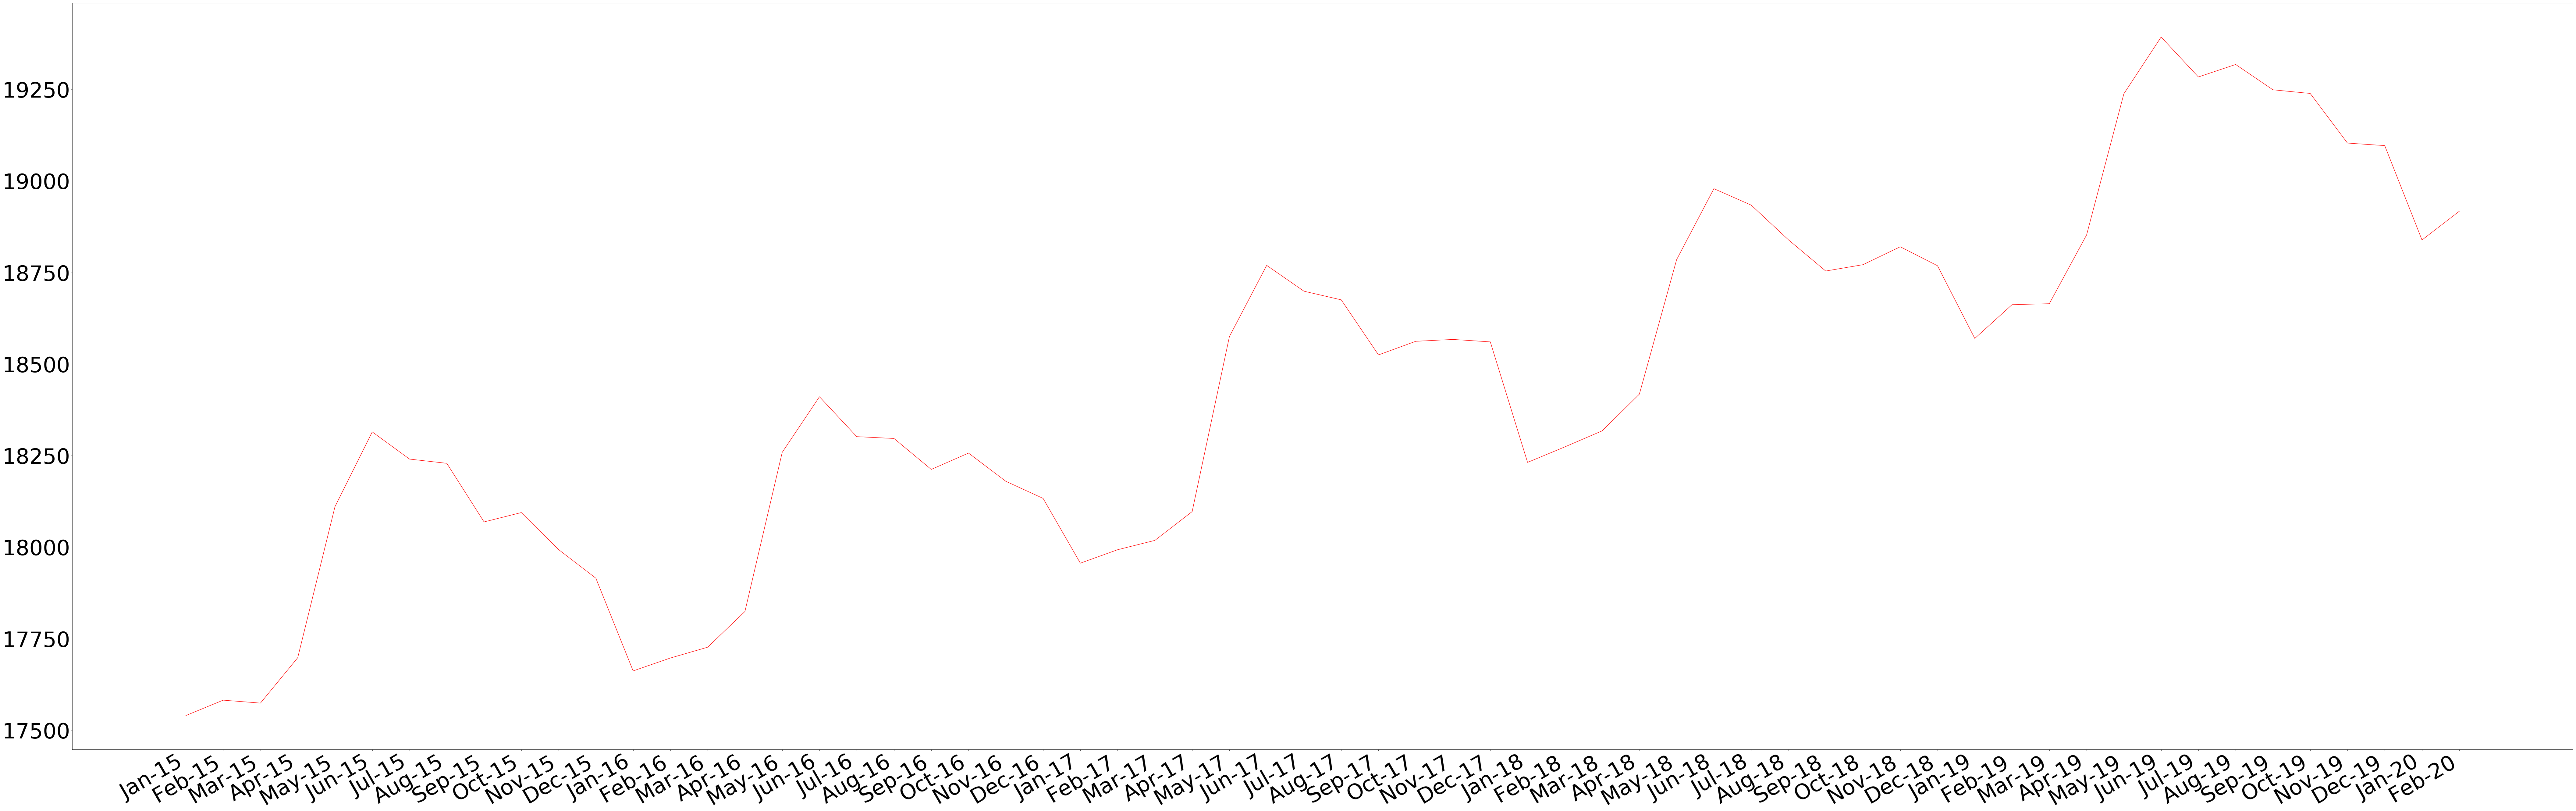

Both sexes - 15 to 24 years - 


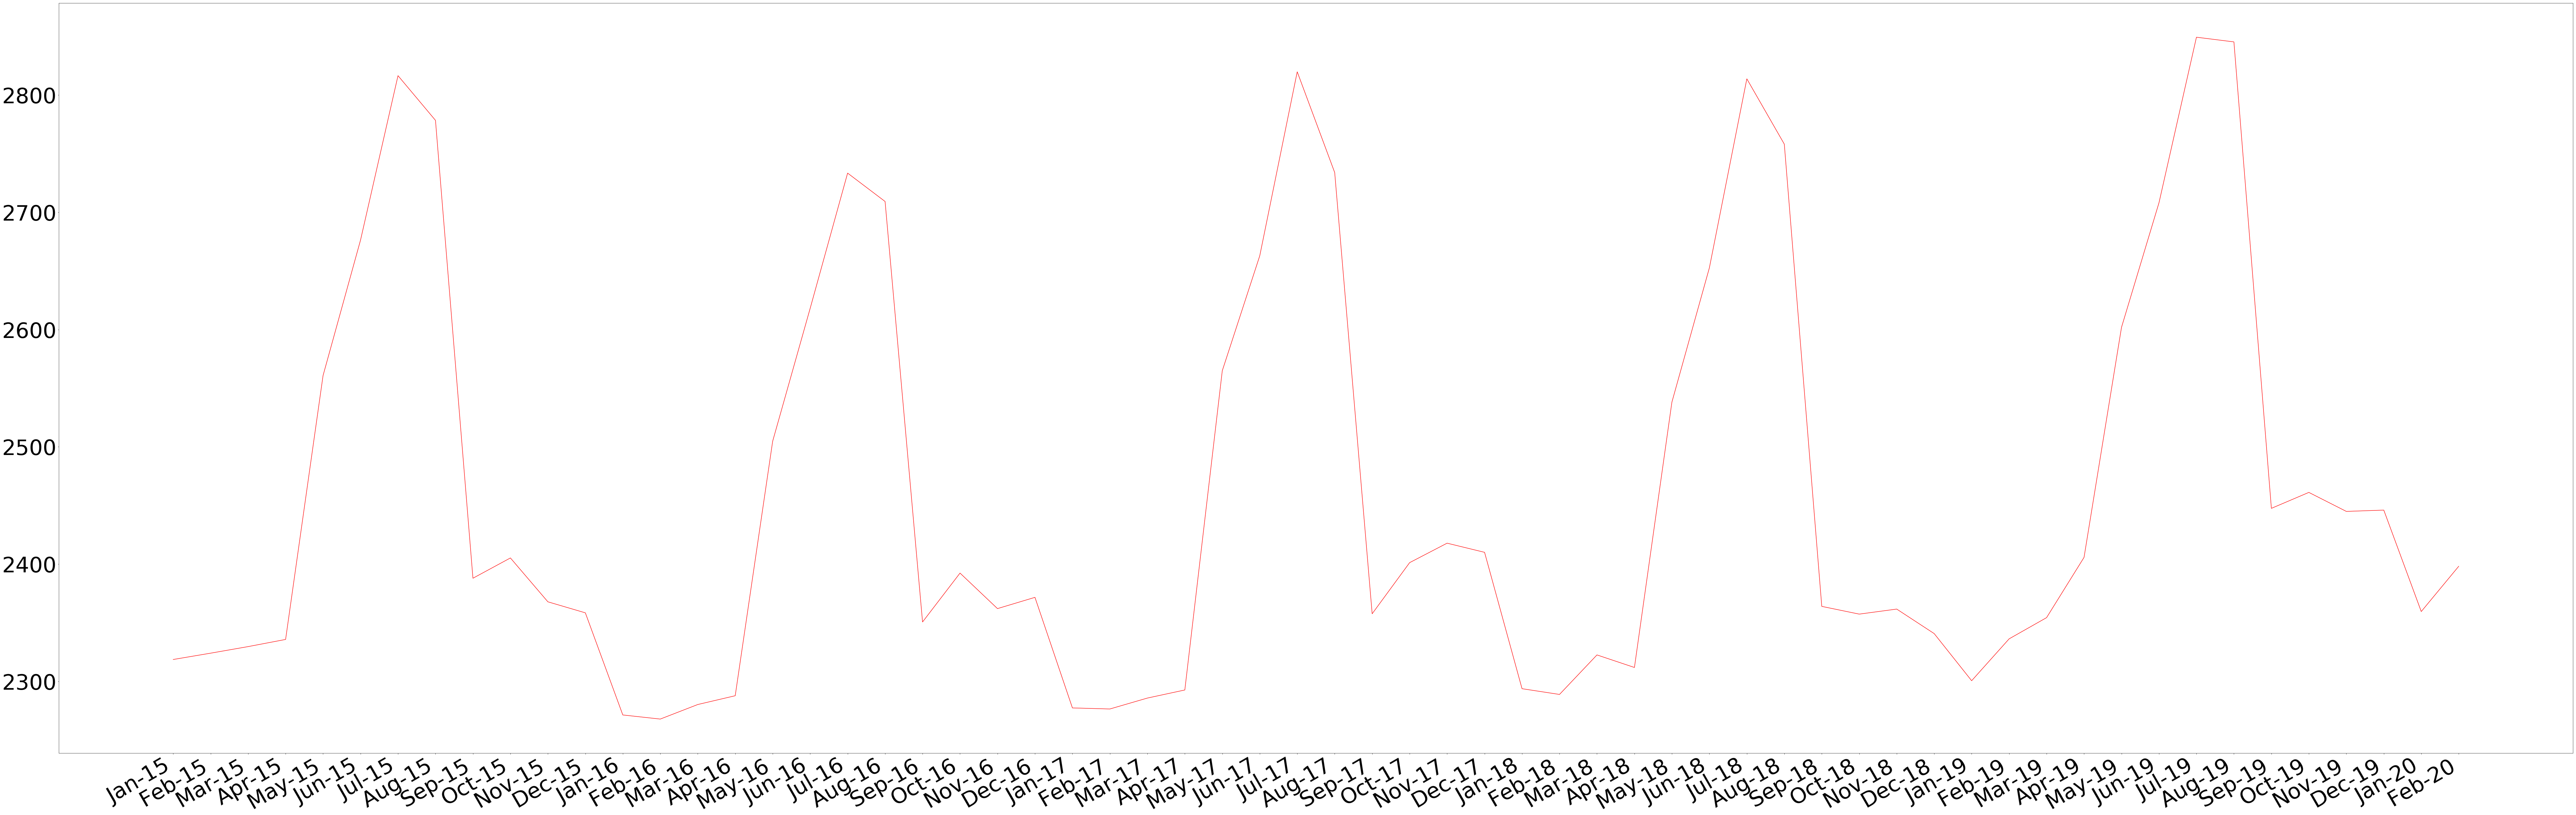

Both sexes - 25 years and over - 


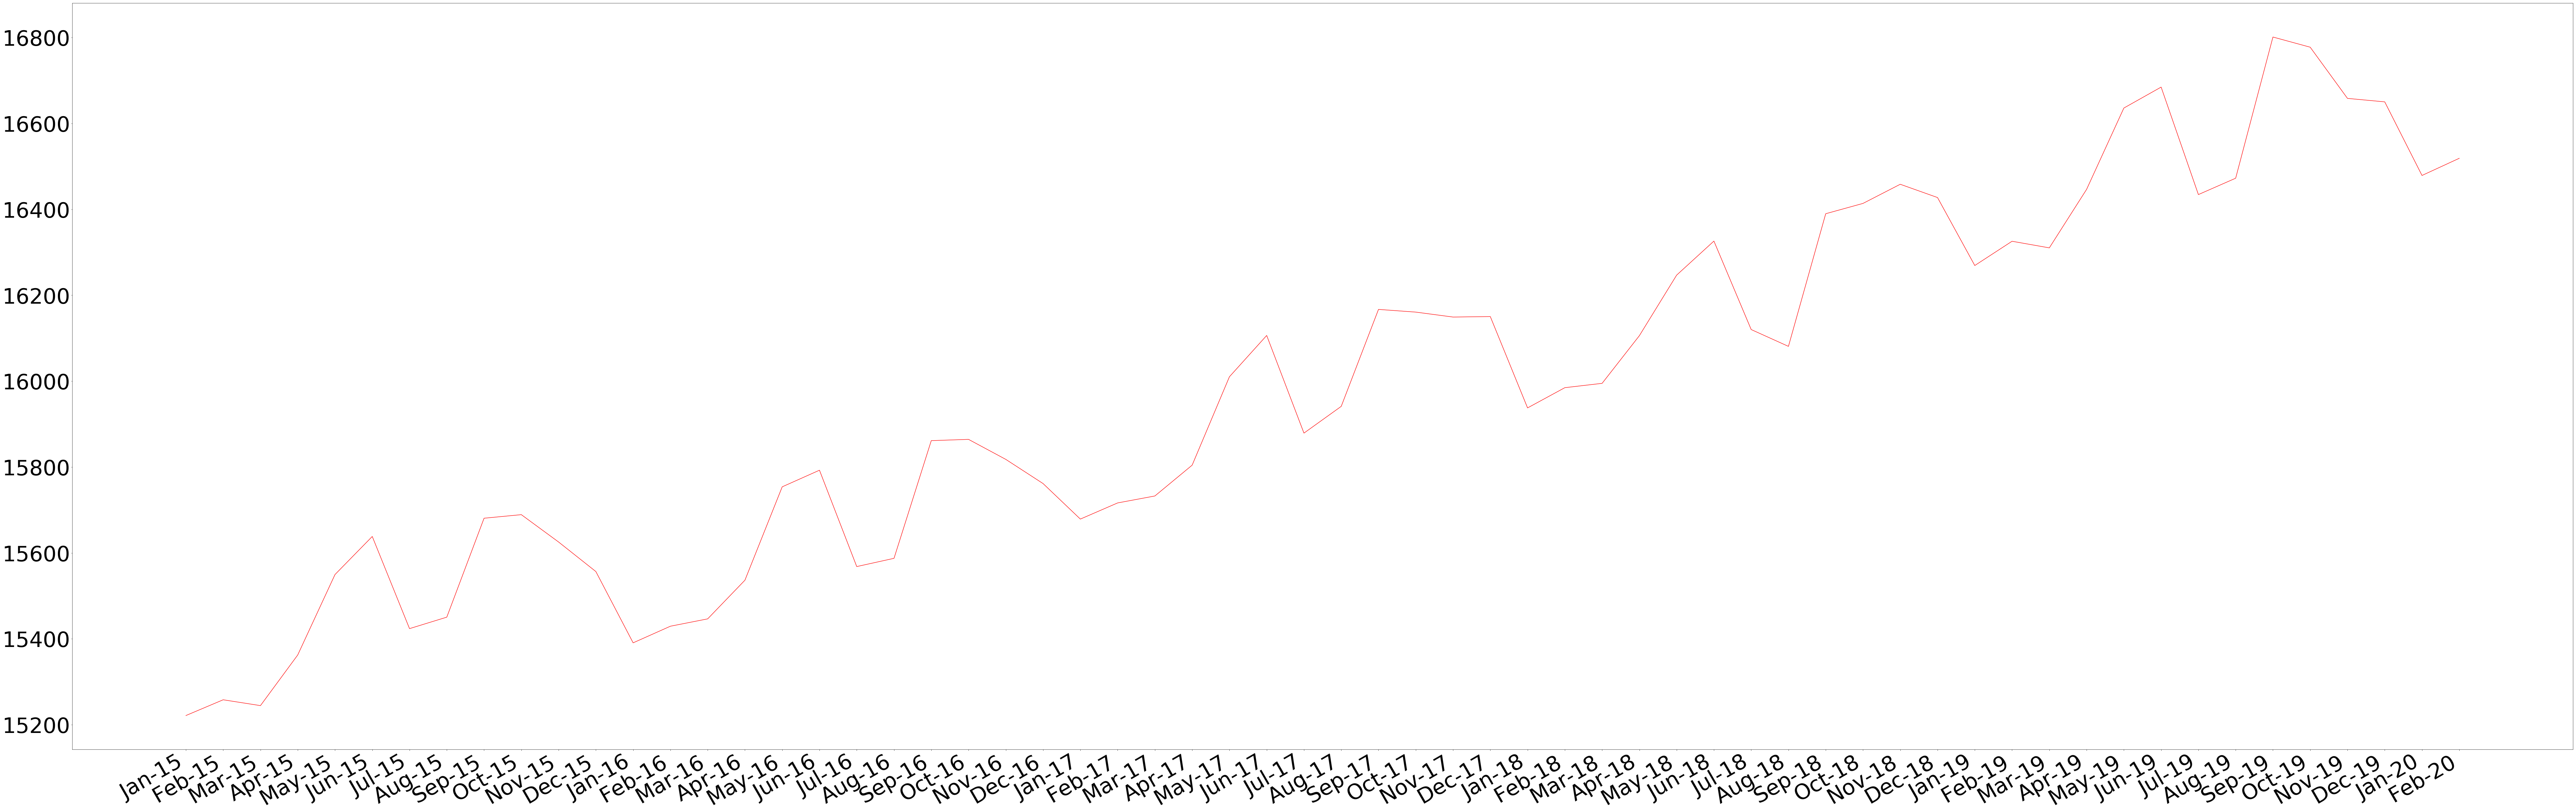

Density Plotting the first  3  each:

Both sexes - 15 years and over - 


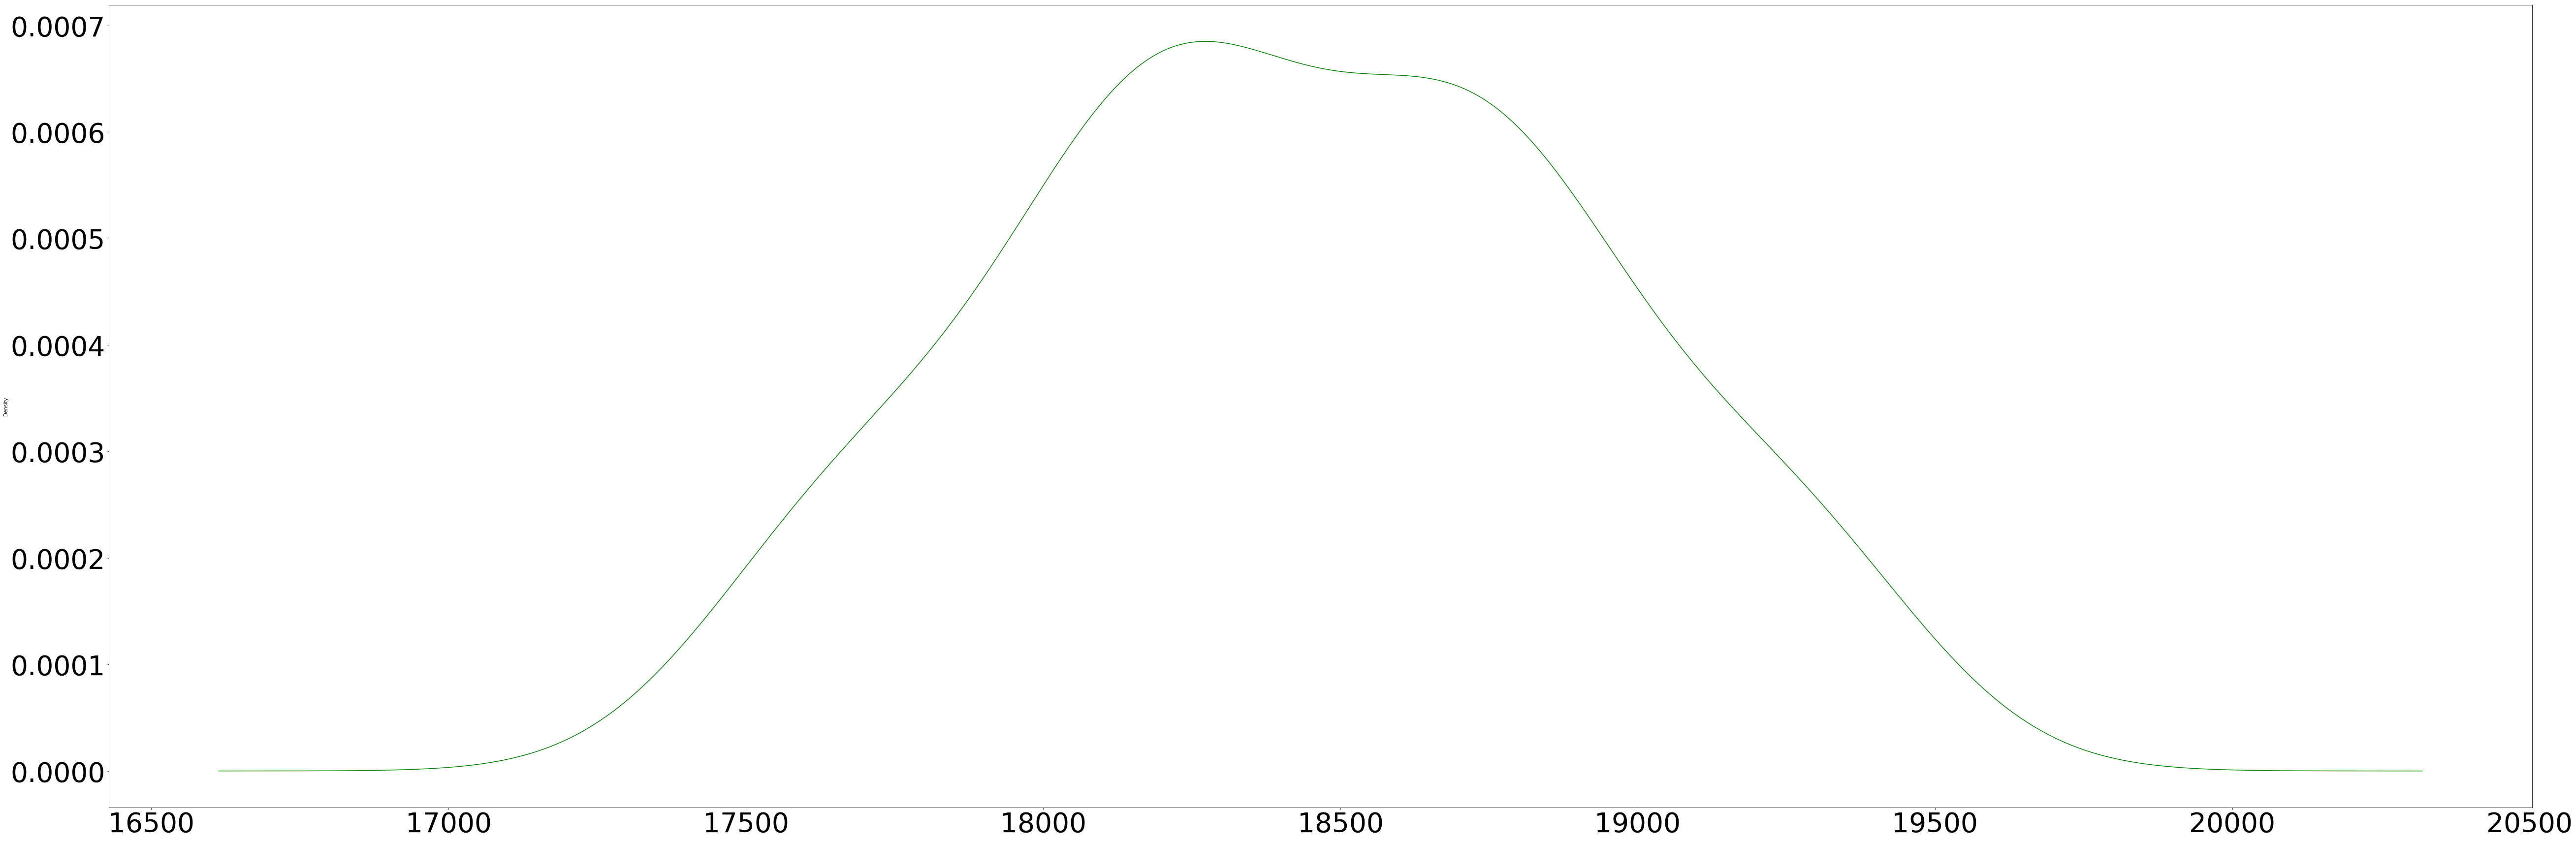

Both sexes - 15 to 24 years - 


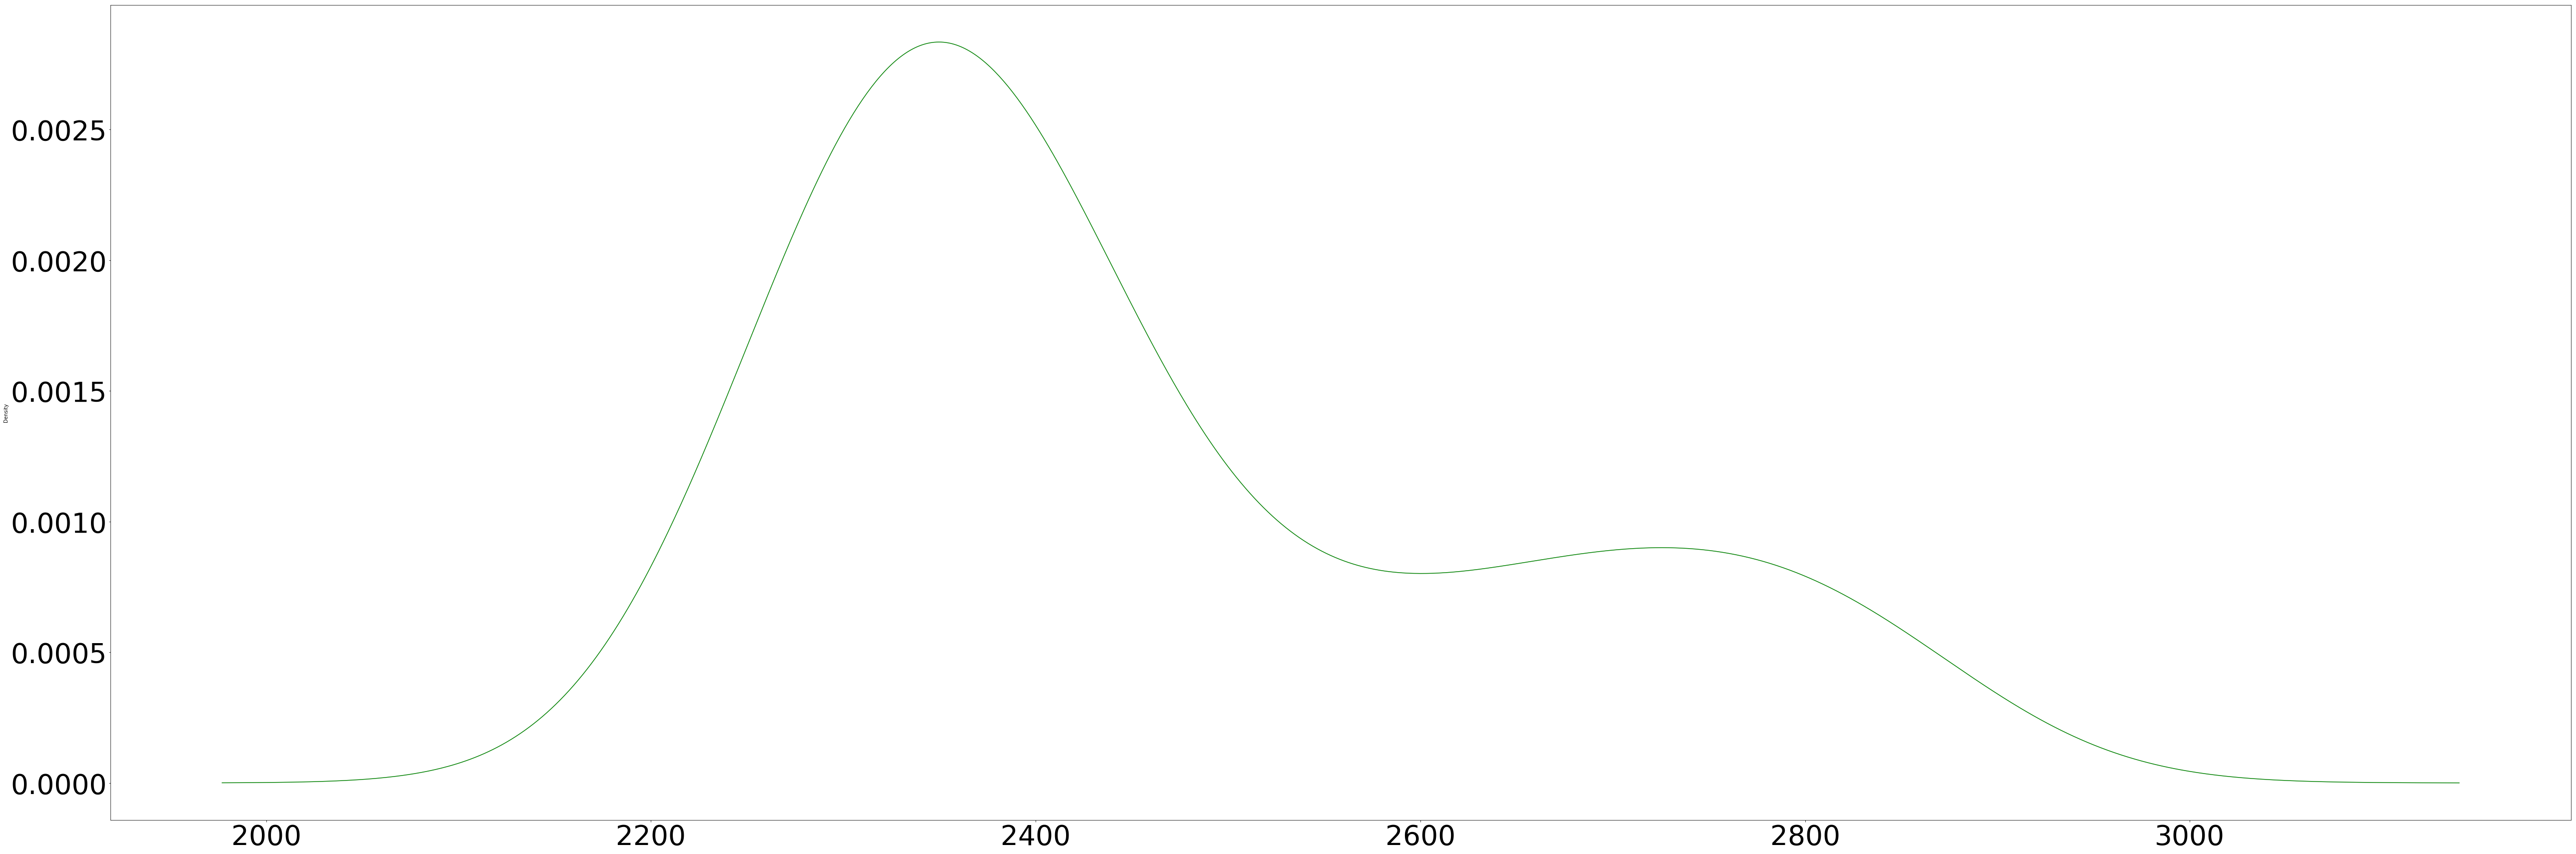

Both sexes - 25 years and over - 


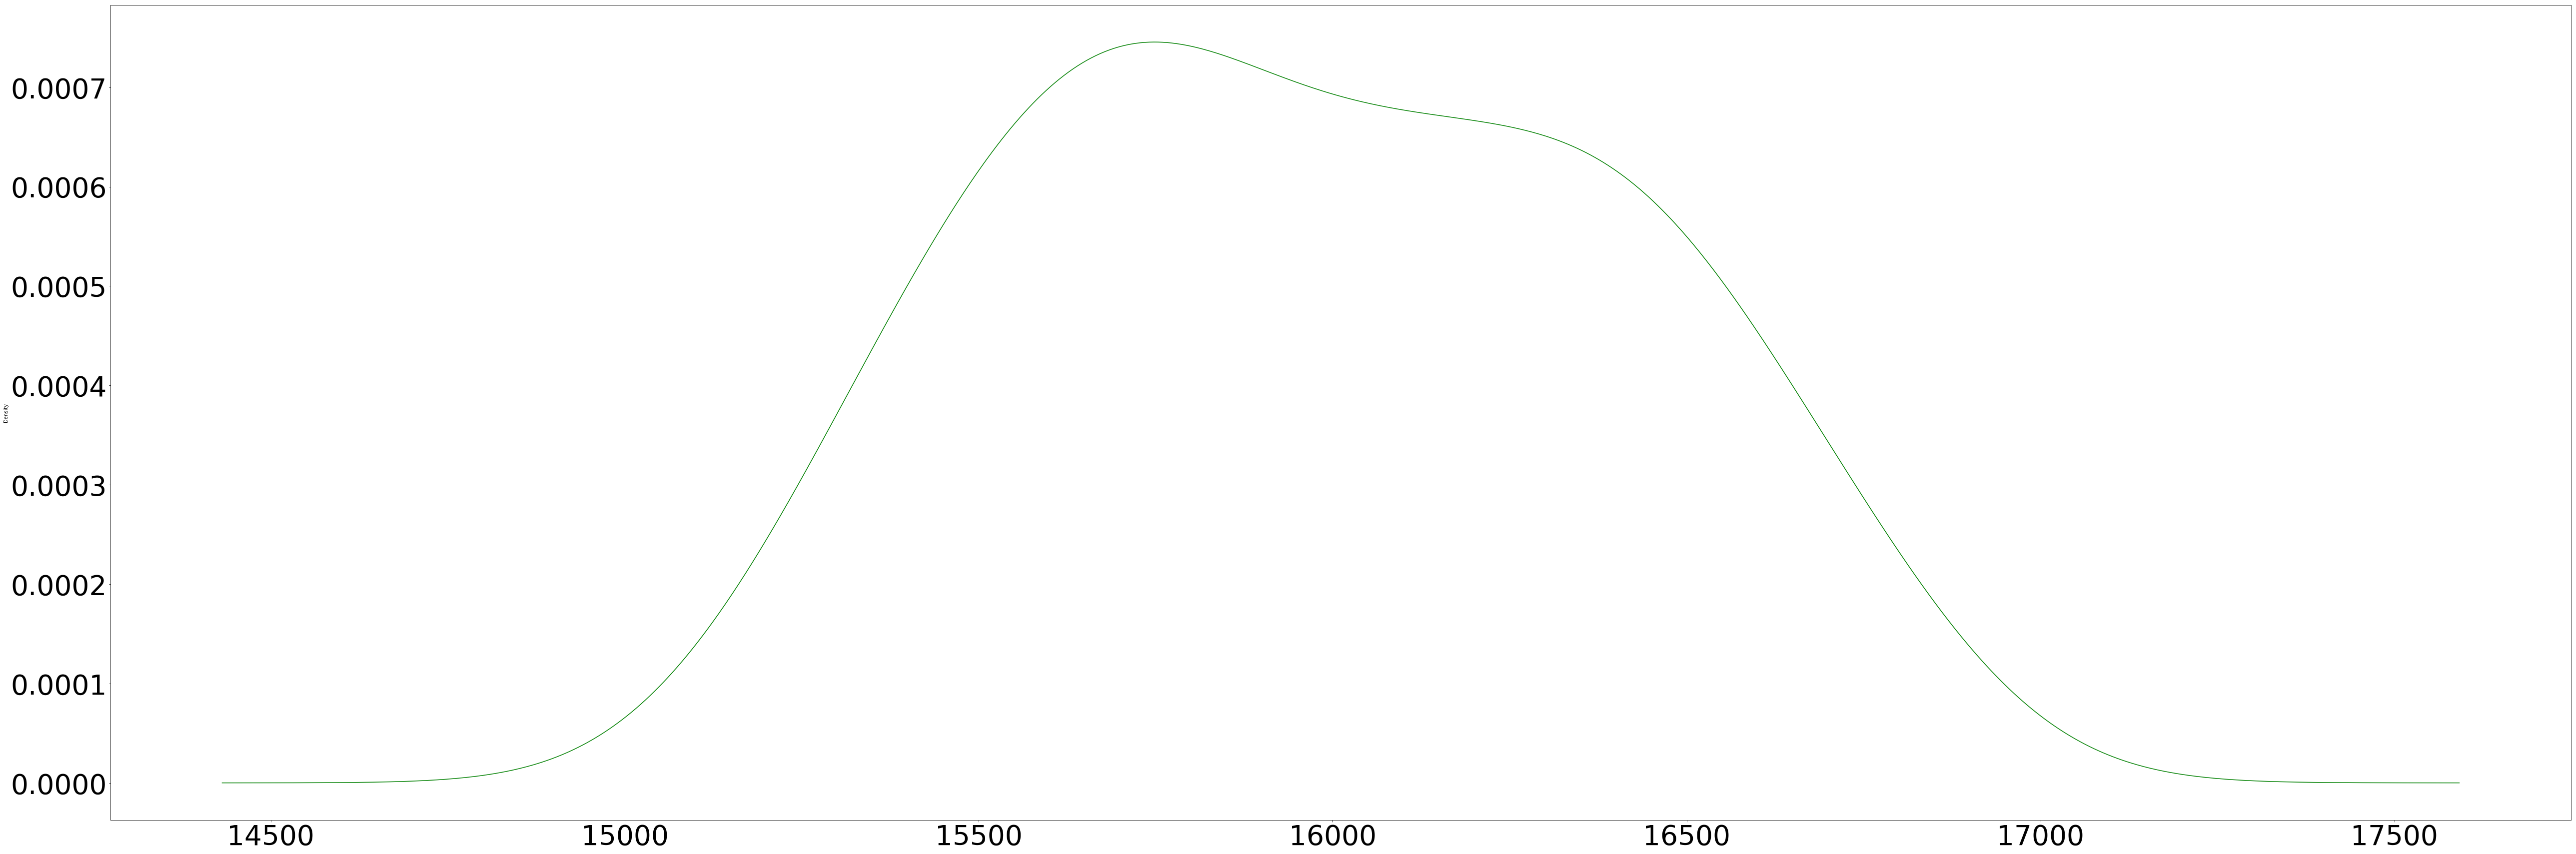

In [327]:
# create the visualize object for the cleaned dataset of the labour force based on age and sex
visualize_agesex = visualize(df=cleaned_agesex, sta=2)

# visualize based on line plots
visualize_agesex.plot_line()

# visualize based on density plots
visualize_agesex.plot_density()

Data frame successfully loaded!!
Line Plotting the first  3  each:

Total all industries 5 - 


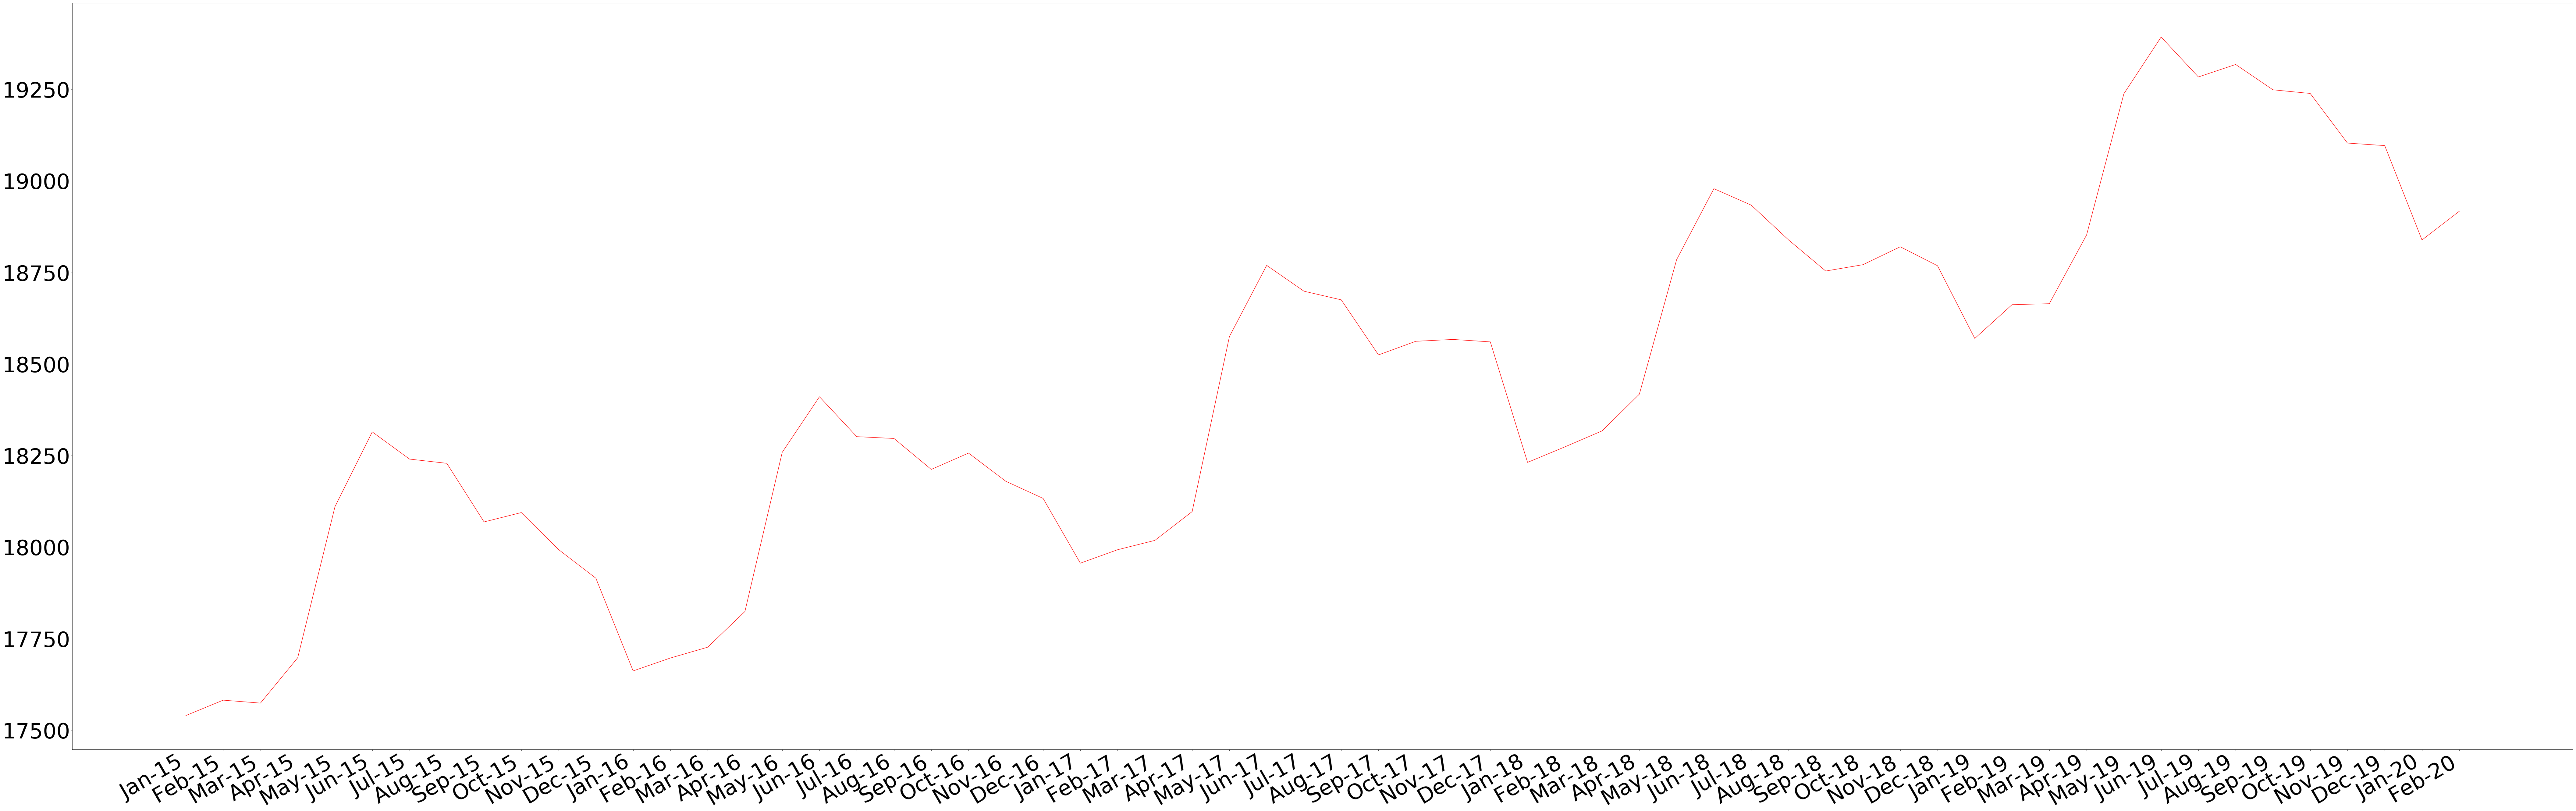

Goods-producing sector 6 - 


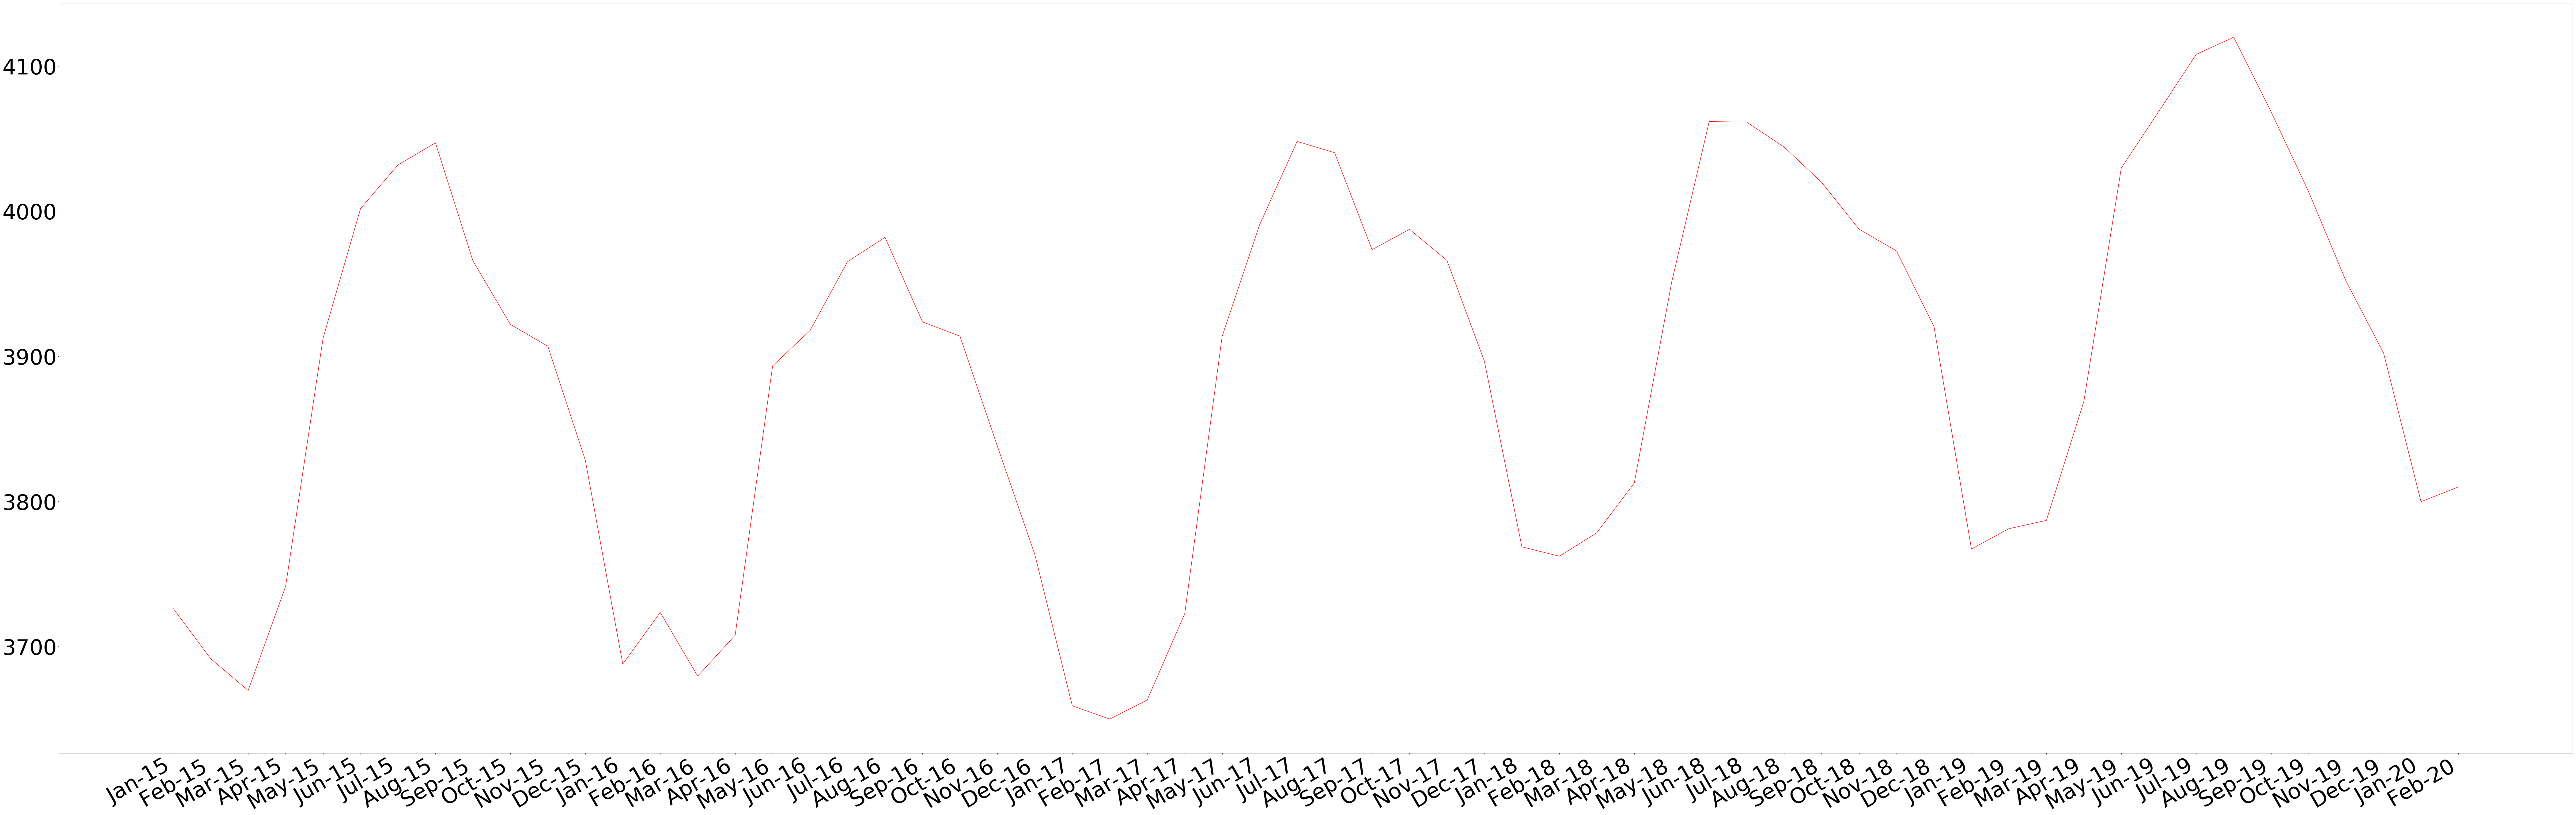

Agriculture 7 - 


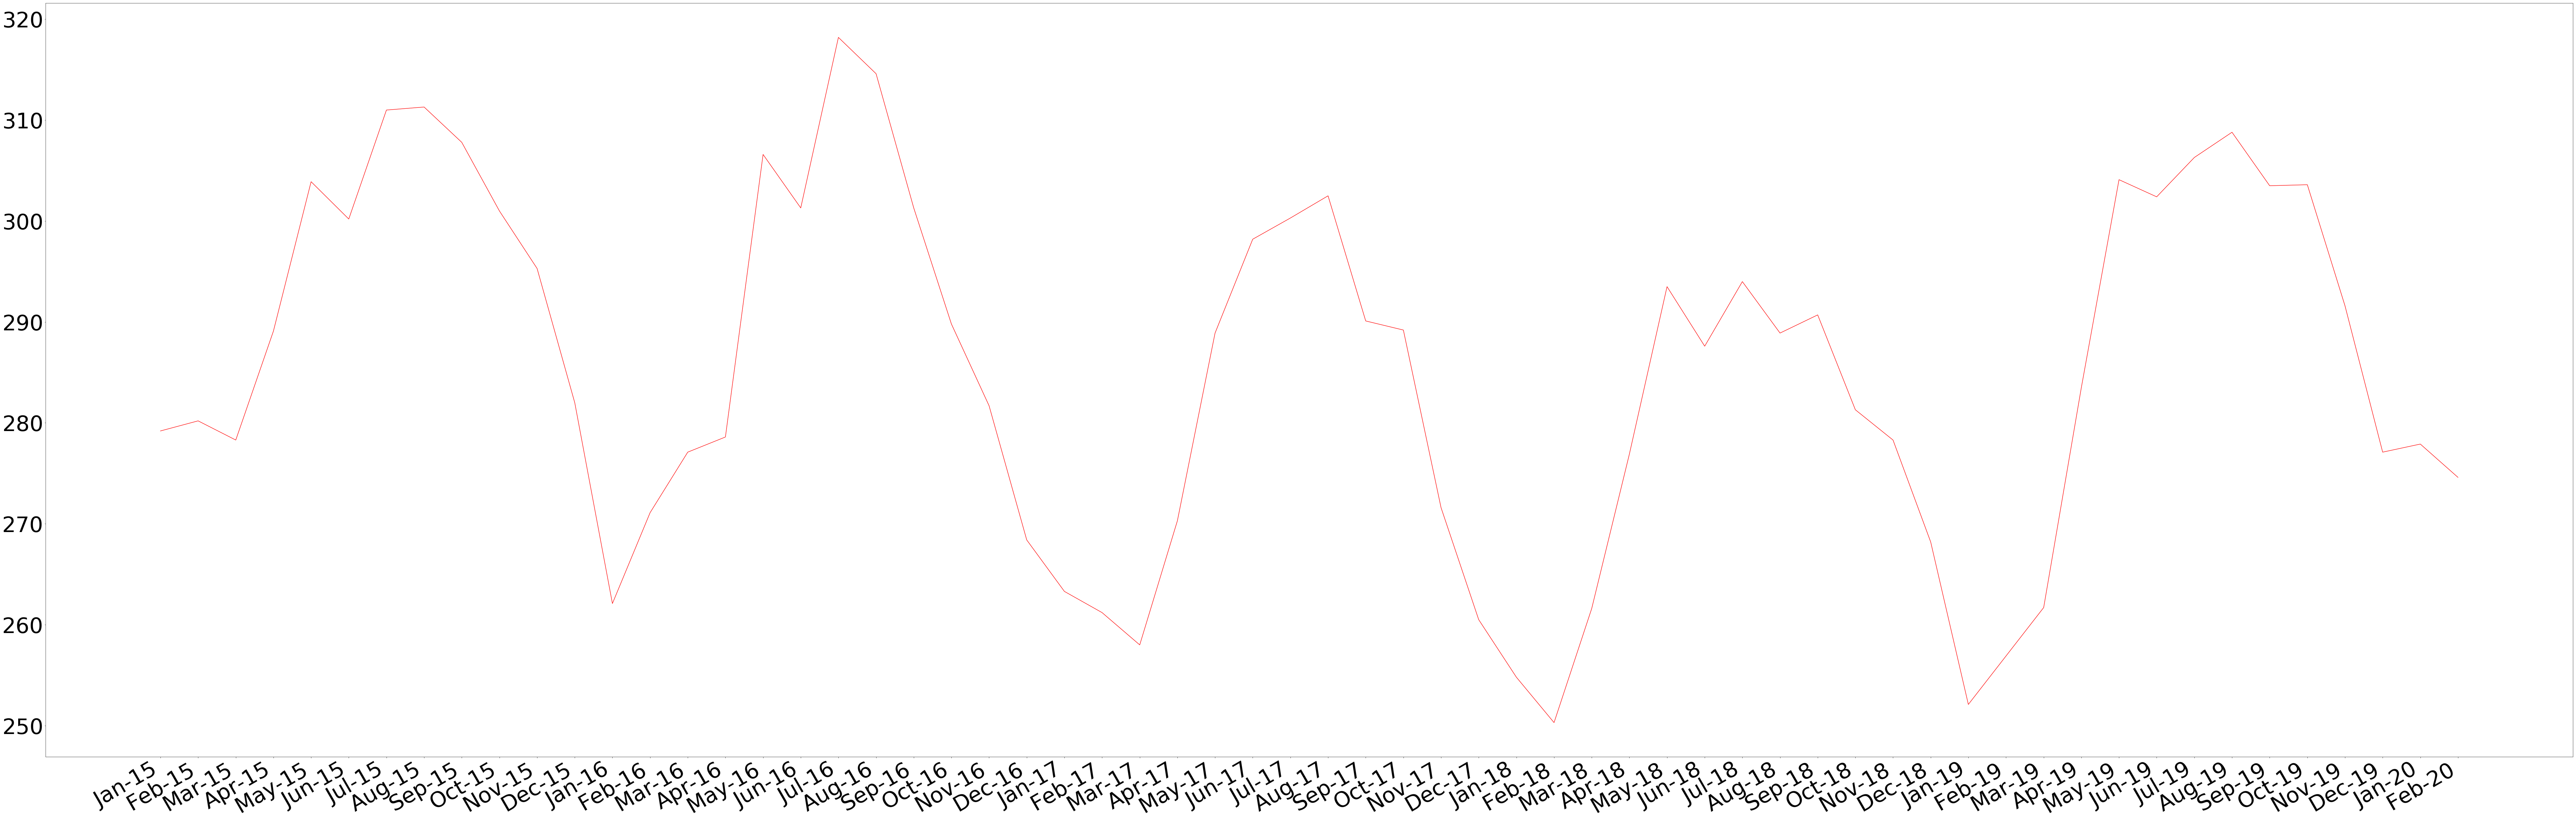

Density Plotting the first  3  each:

Total all industries 5 - 


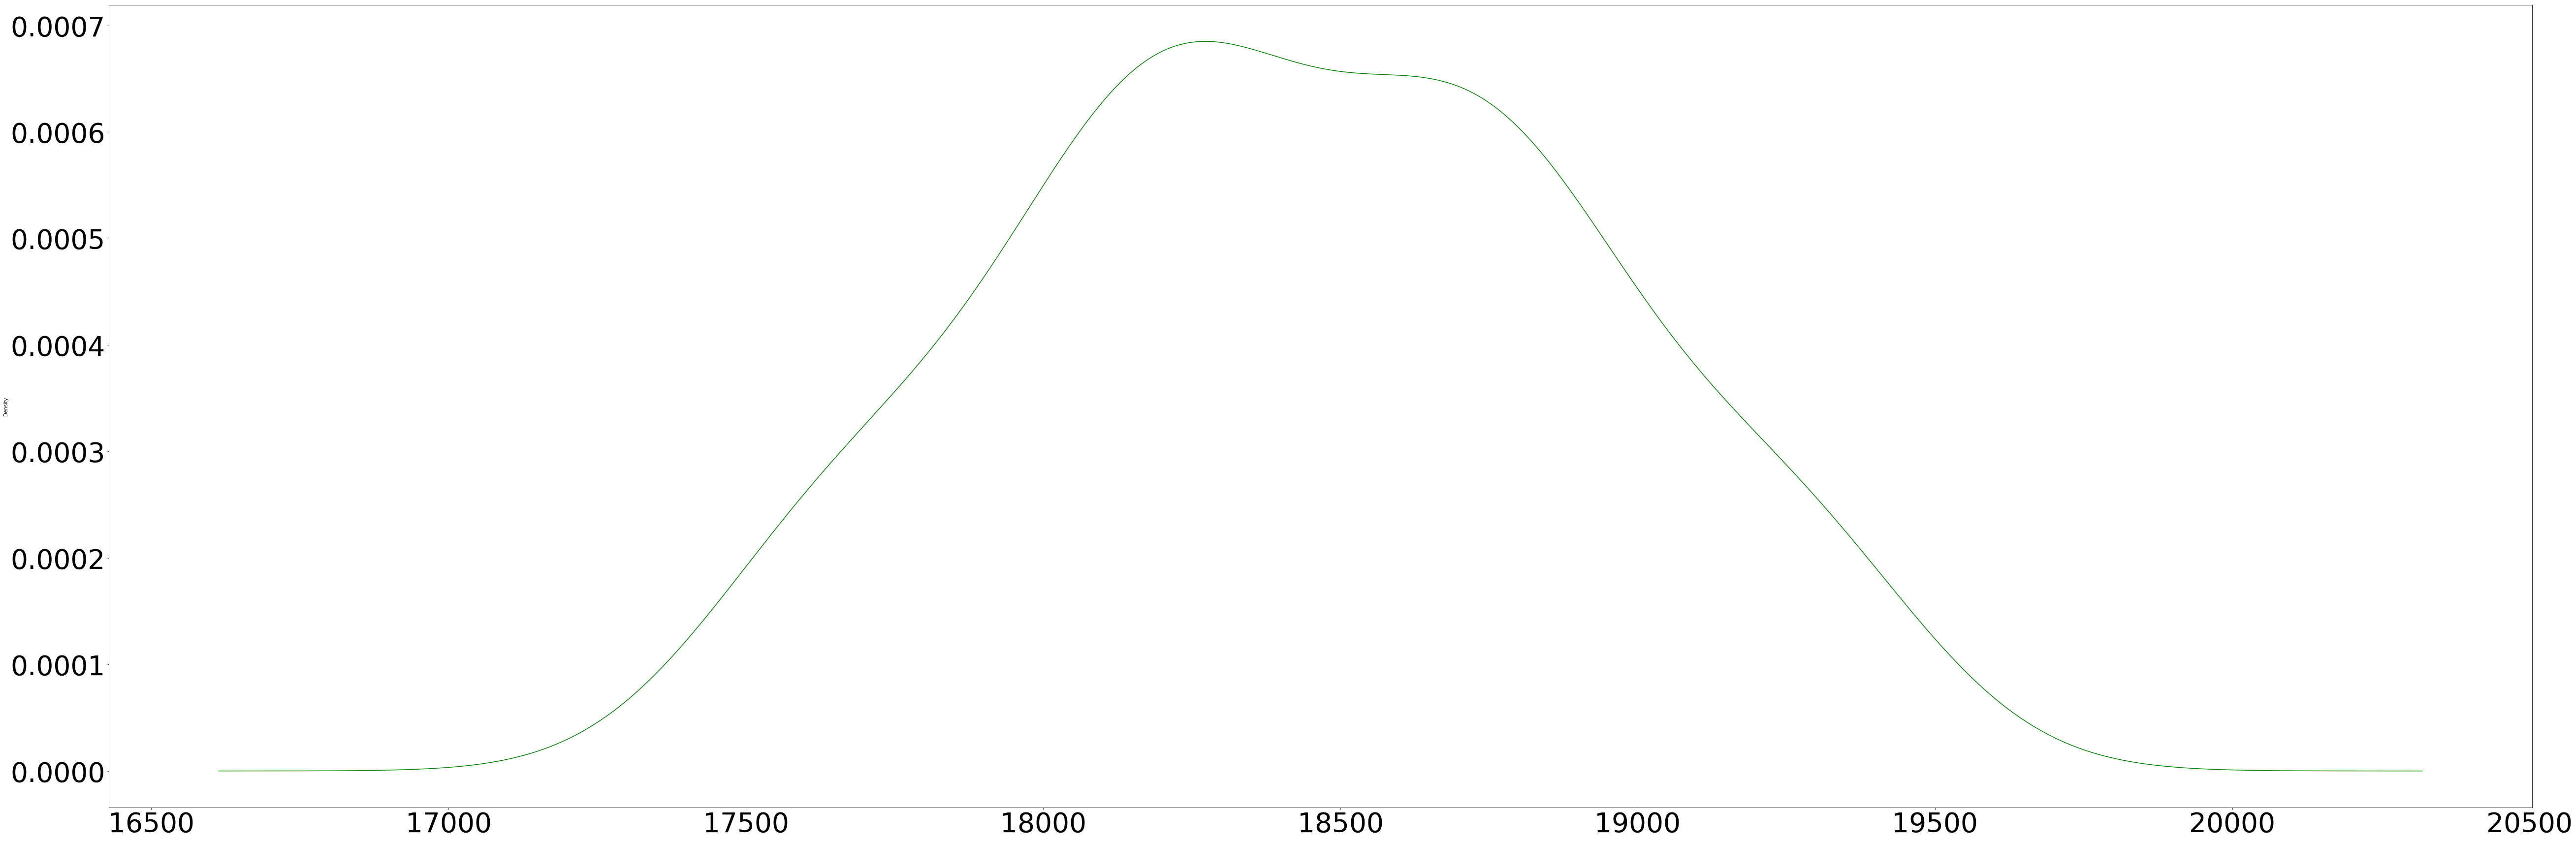

Goods-producing sector 6 - 


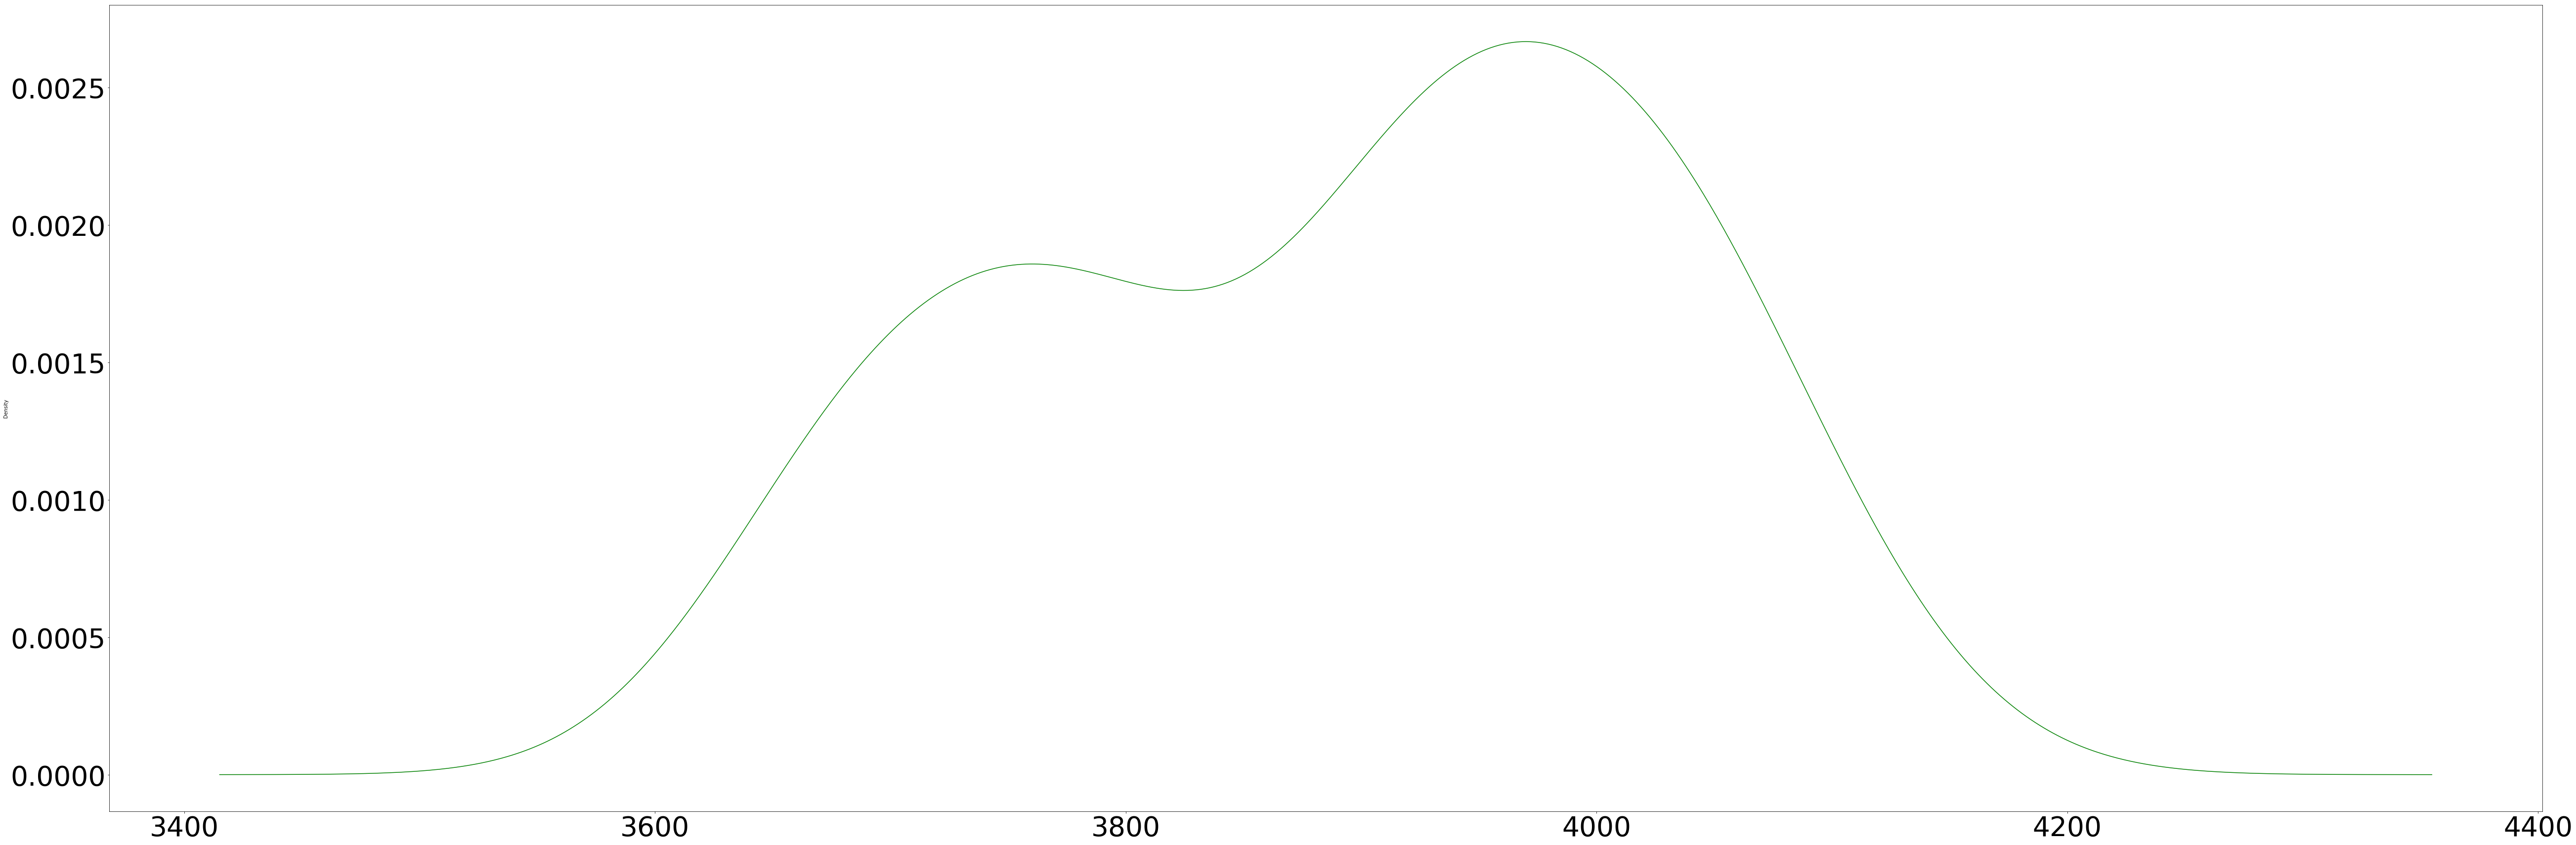

Agriculture 7 - 


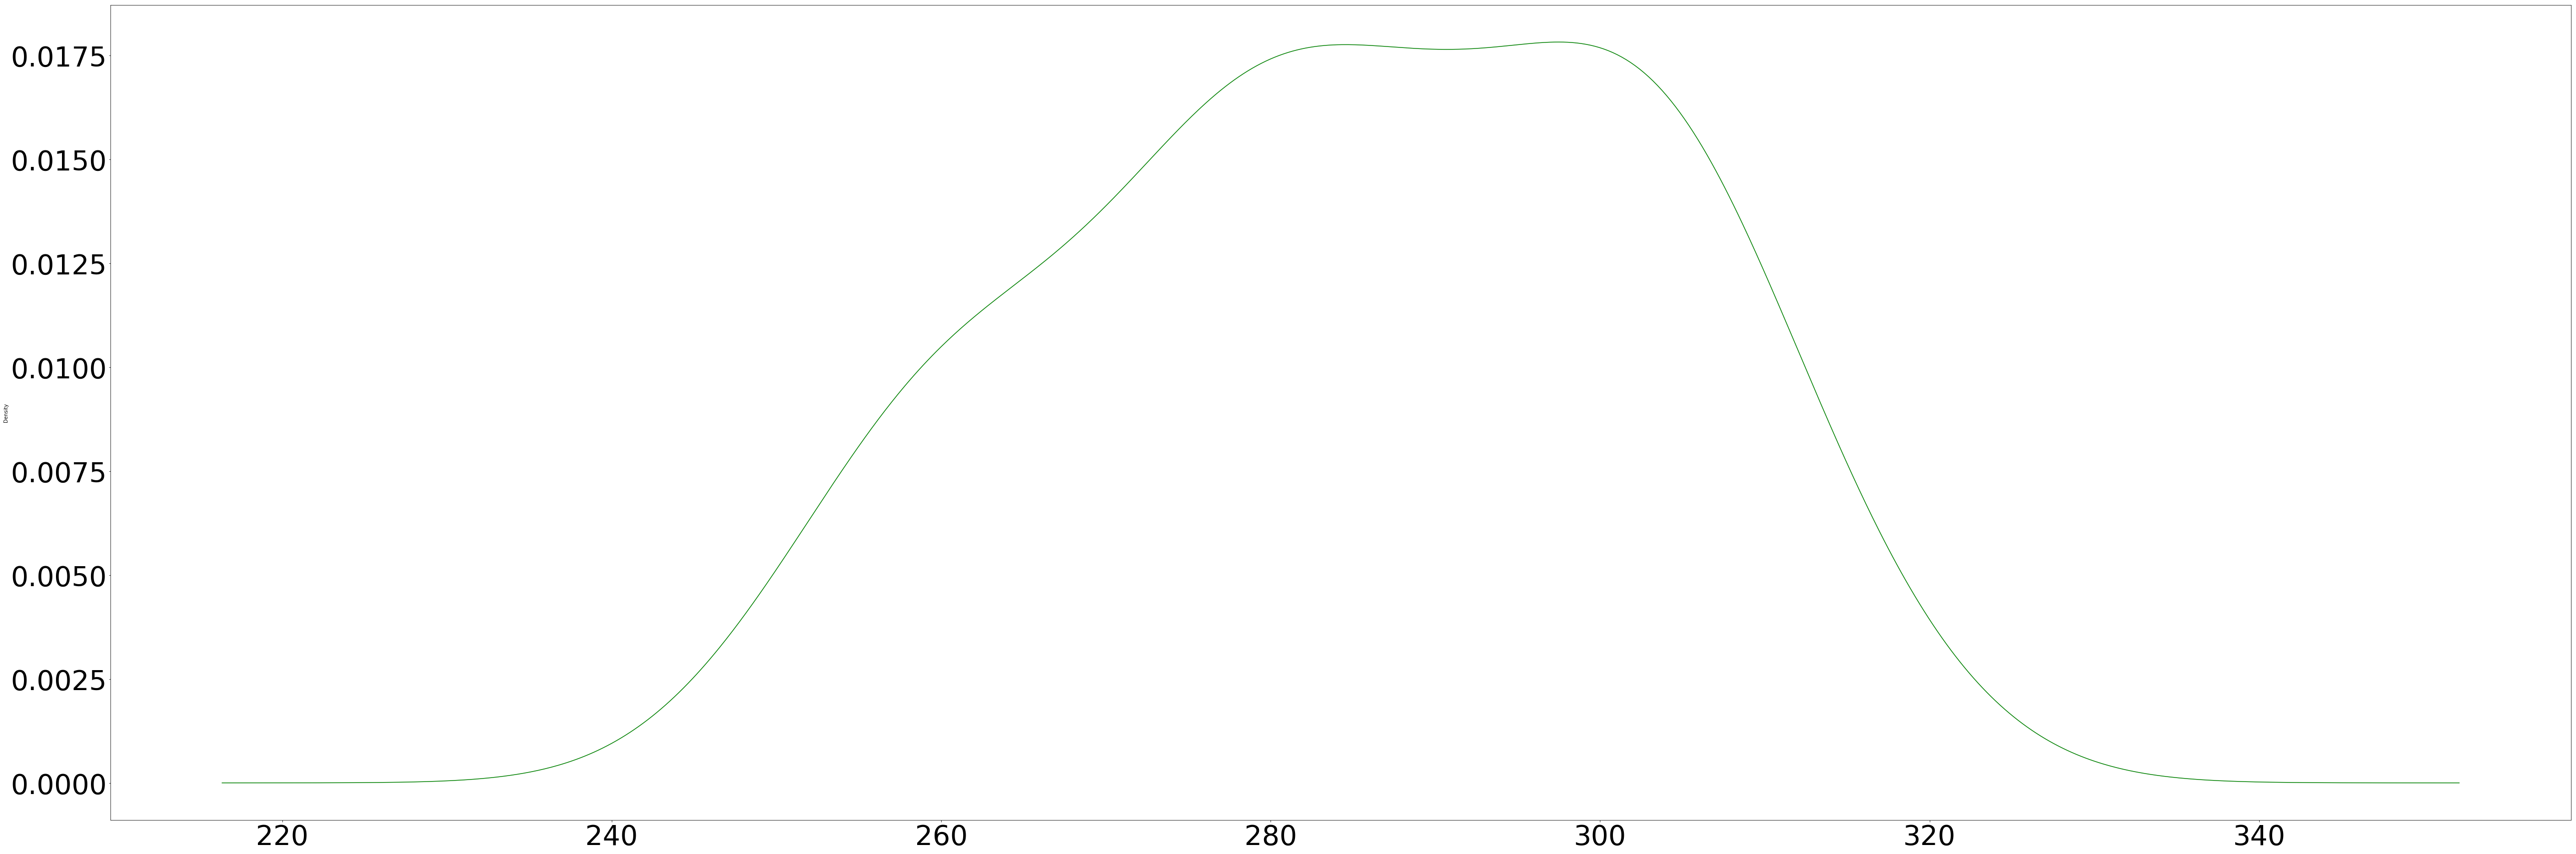

In [328]:
# create the visualize object for the cleaned dataset of the labour force based on industry
visualize_indus = visualize(df=cleaned_indus, sta=1)

# visualize based on line plots
visualize_indus.plot_line()

# visualize based on density plots
visualize_indus.plot_density()

# 5. Prediction Model to estimate future Growth

In [363]:
# Making Predictions by Linear Regression
from sklearn.linear_model import LinearRegression
# Measuring the loss based on error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# class to analyse datasets
class forecast(object):
    
    
    # initialse required data
    def __init__(self, df, st, num, show):
        # df: the dataframe that will be used
        # st: the starting point of the dataset row-wise to identify when numerical values begin
        # num: the number of models required, so either every row gets a model or only the required number of rows
        
        self.cur_df = df.copy()
        self.start = st
        self.numrows = num
        self.disp = show
        self.models = dict()
        self.predicts = dict()
        self.errors = dict()
        print("Data frame successfully loaded!!")
        
        
    # returns the set of models trained using each row of data
    def linear_forecast(self):
        
        # taking one row at a time
        for i in range(self.numrows):
            # expected input
            X = np.arange(self.cur_df.shape[1] - self.start).reshape(-1, 1)
            # expected output
            y = np.array(self.cur_df.iloc[i, self.start:]).reshape(-1, 1)
            
            # applying and training the linear regression model
            lr = LinearRegression()
            model = lr.fit(X, y)
            
            # naming the model
            title = ""
            for j in range(self.start):
                title = title + self.cur_df.iloc[i, j] + " - "
            
            # storing the model
            self.models[title] = model
            
        return self.models
    
    
    # making predictions using the linear regression models that are trained
    def linear_pred(self):
        
        for i, mod in zip(range(self.numrows), self.models.keys()):
            
            # resetting the expected output and input to make predictions
            y = np.array(self.cur_df.iloc[i, self.start:]).reshape(-1, 1)
            X = np.arange(y.shape[0]).reshape(-1, 1)
            
            prediction = self.models[mod].predict(X)
            self.predicts[mod] = prediction
            
            if self.disp == True:
                print("These are the predictions of model - ", mod, " : ")
                print(prediction, "\n")
                
                plt.title(mod)
                p1, = plt.plot(X, y, 'b-', label='real values')
                p2, = plt.plot(X, prediction, 'r-', label='predictions')
                plt.legend(handles=[p1, p2])
                plt.show()
            
        return self.predicts
    
    
    # measuring the errors between real values and the predictions
    def linear_error(self):
        
        # find the error between each set of real and predicted values
        for i, predict in zip(range(self.numrows), self.predicts.keys()):
            real = np.array(self.cur_df.iloc[i, self.start:]).reshape(-1, 1)
            pred = self.predicts[predict]
            
            # using the below error metrics to identify how well our model predicts
            e1 = mean_squared_error(real, pred)
            e2 = mean_absolute_error(real, pred)
            e3 = r2_score(real, pred)
            
            err = [e1, e2, e3]
            self.errors[predict] = err
            
            if self.disp == True:
                print("The errors reported of model - ", predict, " : ")
                print("mean squared error, mean absolute error, r2_score")
                print(err, "\n")
            
        return self.errors
    
    
    def run_all(self):
        mods = self.linear_forecast()
        preds = self.linear_pred()
        errors = self.linear_error()
        
        return mods, preds, errors

Data frame successfully loaded!!
These are the predictions of model -  Both sexes - 15 years and over -   : 
[[17725.7078341 ]
 [17749.31217799]
 [17772.91652187]
 [17796.52086576]
 [17820.12520964]
 [17843.72955352]
 [17867.33389741]
 [17890.93824129]
 [17914.54258518]
 [17938.14692906]
 [17961.75127295]
 [17985.35561683]
 [18008.95996072]
 [18032.5643046 ]
 [18056.16864849]
 [18079.77299237]
 [18103.37733625]
 [18126.98168014]
 [18150.58602402]
 [18174.19036791]
 [18197.79471179]
 [18221.39905568]
 [18245.00339956]
 [18268.60774345]
 [18292.21208733]
 [18315.81643122]
 [18339.4207751 ]
 [18363.02511898]
 [18386.62946287]
 [18410.23380675]
 [18433.83815064]
 [18457.44249452]
 [18481.04683841]
 [18504.65118229]
 [18528.25552618]
 [18551.85987006]
 [18575.46421395]
 [18599.06855783]
 [18622.67290171]
 [18646.2772456 ]
 [18669.88158948]
 [18693.48593337]
 [18717.09027725]
 [18740.69462114]
 [18764.29896502]
 [18787.90330891]
 [18811.50765279]
 [18835.11199668]
 [18858.71634056]
 [18882.3

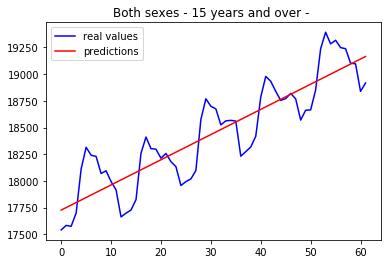

These are the predictions of model -  Both sexes - 15 to 24 years -   : 
[[2432.15652842]
 [2433.14848782]
 [2434.14044723]
 [2435.13240664]
 [2436.12436604]
 [2437.11632545]
 [2438.10828486]
 [2439.10024426]
 [2440.09220367]
 [2441.08416308]
 [2442.07612248]
 [2443.06808189]
 [2444.0600413 ]
 [2445.05200071]
 [2446.04396011]
 [2447.03591952]
 [2448.02787893]
 [2449.01983833]
 [2450.01179774]
 [2451.00375715]
 [2451.99571655]
 [2452.98767596]
 [2453.97963537]
 [2454.97159477]
 [2455.96355418]
 [2456.95551359]
 [2457.94747299]
 [2458.9394324 ]
 [2459.93139181]
 [2460.92335121]
 [2461.91531062]
 [2462.90727003]
 [2463.89922943]
 [2464.89118884]
 [2465.88314825]
 [2466.87510765]
 [2467.86706706]
 [2468.85902647]
 [2469.85098587]
 [2470.84294528]
 [2471.83490469]
 [2472.82686409]
 [2473.8188235 ]
 [2474.81078291]
 [2475.80274231]
 [2476.79470172]
 [2477.78666113]
 [2478.77862053]
 [2479.77057994]
 [2480.76253935]
 [2481.75449875]
 [2482.74645816]
 [2483.73841757]
 [2484.73037697]
 [2485.72

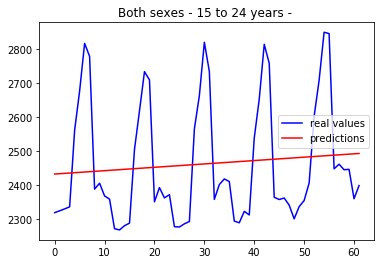

These are the predictions of model -  Both sexes - 25 years and over -   : 
[[15293.54654378]
 [15316.15908438]
 [15338.77162499]
 [15361.3841656 ]
 [15383.9967062 ]
 [15406.60924681]
 [15429.22178741]
 [15451.83432802]
 [15474.44686863]
 [15497.05940923]
 [15519.67194984]
 [15542.28449044]
 [15564.89703105]
 [15587.50957166]
 [15610.12211226]
 [15632.73465287]
 [15655.34719347]
 [15677.95973408]
 [15700.57227468]
 [15723.18481529]
 [15745.7973559 ]
 [15768.4098965 ]
 [15791.02243711]
 [15813.63497771]
 [15836.24751832]
 [15858.86005893]
 [15881.47259953]
 [15904.08514014]
 [15926.69768074]
 [15949.31022135]
 [15971.92276196]
 [15994.53530256]
 [16017.14784317]
 [16039.76038377]
 [16062.37292438]
 [16084.98546498]
 [16107.59800559]
 [16130.2105462 ]
 [16152.8230868 ]
 [16175.43562741]
 [16198.04816801]
 [16220.66070862]
 [16243.27324923]
 [16265.88578983]
 [16288.49833044]
 [16311.11087104]
 [16333.72341165]
 [16356.33595226]
 [16378.94849286]
 [16401.56103347]
 [16424.17357407]
 [1644

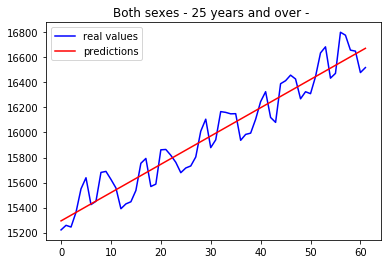

The errors reported of model -  Both sexes - 15 years and over -   : 
mean squared error, mean absolute error, r2_score
[53948.167331185665, 197.88898371378338, 0.7678453241821237] 

The errors reported of model -  Both sexes - 15 to 24 years -   : 
mean squared error, mean absolute error, r2_score
[31388.26674864608, 152.18430263492442, 0.00993965408249009] 

The errors reported of model -  Both sexes - 25 years and over -   : 
mean squared error, mean absolute error, r2_score
[15779.41169566251, 111.58639419808131, 0.9121080244933062] 



In [364]:
forecast_agesex = forecast(cleaned_agesex, 2, 3, True)
models_agesex, predictions_agesex, errors_agesex = forecast_agesex.run_all()

Data frame successfully loaded!!
These are the predictions of model -  Total all industries 5 -   : 
[[17725.7078341 ]
 [17749.31217799]
 [17772.91652187]
 [17796.52086576]
 [17820.12520964]
 [17843.72955352]
 [17867.33389741]
 [17890.93824129]
 [17914.54258518]
 [17938.14692906]
 [17961.75127295]
 [17985.35561683]
 [18008.95996072]
 [18032.5643046 ]
 [18056.16864849]
 [18079.77299237]
 [18103.37733625]
 [18126.98168014]
 [18150.58602402]
 [18174.19036791]
 [18197.79471179]
 [18221.39905568]
 [18245.00339956]
 [18268.60774345]
 [18292.21208733]
 [18315.81643122]
 [18339.4207751 ]
 [18363.02511898]
 [18386.62946287]
 [18410.23380675]
 [18433.83815064]
 [18457.44249452]
 [18481.04683841]
 [18504.65118229]
 [18528.25552618]
 [18551.85987006]
 [18575.46421395]
 [18599.06855783]
 [18622.67290171]
 [18646.2772456 ]
 [18669.88158948]
 [18693.48593337]
 [18717.09027725]
 [18740.69462114]
 [18764.29896502]
 [18787.90330891]
 [18811.50765279]
 [18835.11199668]
 [18858.71634056]
 [18882.32068445]

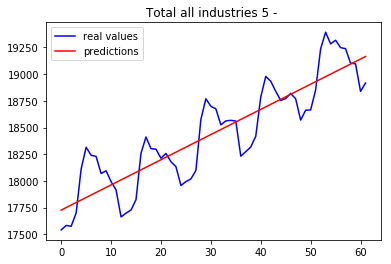

These are the predictions of model -  Goods-producing sector 6 -   : 
[[3813.86620584]
 [3816.35731913]
 [3818.84843242]
 [3821.33954572]
 [3823.83065901]
 [3826.3217723 ]
 [3828.8128856 ]
 [3831.30399889]
 [3833.79511219]
 [3836.28622548]
 [3838.77733877]
 [3841.26845207]
 [3843.75956536]
 [3846.25067865]
 [3848.74179195]
 [3851.23290524]
 [3853.72401853]
 [3856.21513183]
 [3858.70624512]
 [3861.19735841]
 [3863.68847171]
 [3866.179585  ]
 [3868.6706983 ]
 [3871.16181159]
 [3873.65292488]
 [3876.14403818]
 [3878.63515147]
 [3881.12626476]
 [3883.61737806]
 [3886.10849135]
 [3888.59960464]
 [3891.09071794]
 [3893.58183123]
 [3896.07294452]
 [3898.56405782]
 [3901.05517111]
 [3903.5462844 ]
 [3906.0373977 ]
 [3908.52851099]
 [3911.01962429]
 [3913.51073758]
 [3916.00185087]
 [3918.49296417]
 [3920.98407746]
 [3923.47519075]
 [3925.96630405]
 [3928.45741734]
 [3930.94853063]
 [3933.43964393]
 [3935.93075722]
 [3938.42187051]
 [3940.91298381]
 [3943.4040971 ]
 [3945.8952104 ]
 [3948.38632

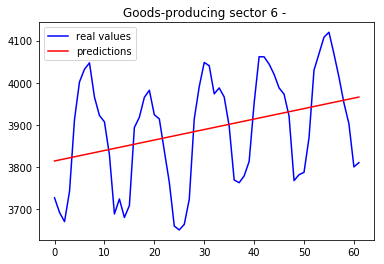

These are the predictions of model -  Agriculture 7 -   : 
[[289.95483871]
 [289.80528821]
 [289.6557377 ]
 [289.5061872 ]
 [289.3566367 ]
 [289.2070862 ]
 [289.0575357 ]
 [288.90798519]
 [288.75843469]
 [288.60888419]
 [288.45933369]
 [288.30978318]
 [288.16023268]
 [288.01068218]
 [287.86113168]
 [287.71158117]
 [287.56203067]
 [287.41248017]
 [287.26292967]
 [287.11337916]
 [286.96382866]
 [286.81427816]
 [286.66472766]
 [286.51517715]
 [286.36562665]
 [286.21607615]
 [286.06652565]
 [285.91697515]
 [285.76742464]
 [285.61787414]
 [285.46832364]
 [285.31877314]
 [285.16922263]
 [285.01967213]
 [284.87012163]
 [284.72057113]
 [284.57102062]
 [284.42147012]
 [284.27191962]
 [284.12236912]
 [283.97281861]
 [283.82326811]
 [283.67371761]
 [283.52416711]
 [283.3746166 ]
 [283.2250661 ]
 [283.0755156 ]
 [282.9259651 ]
 [282.7764146 ]
 [282.62686409]
 [282.47731359]
 [282.32776309]
 [282.17821259]
 [282.02866208]
 [281.87911158]
 [281.72956108]
 [281.58001058]
 [281.43046007]
 [281.2809095

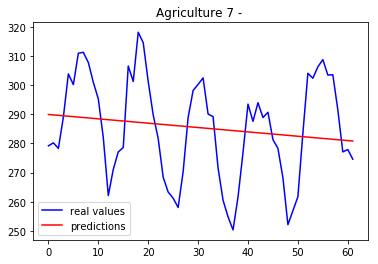

The errors reported of model -  Total all industries 5 -   : 
mean squared error, mean absolute error, r2_score
[53948.167331185665, 197.88898371378338, 0.7678453241821237] 

The errors reported of model -  Goods-producing sector 6 -   : 
mean squared error, mean absolute error, r2_score
[15486.233233694089, 111.2918176567637, 0.11373494614732937] 

The errors reported of model -  Agriculture 7 -   : 
mean squared error, mean absolute error, r2_score
[298.21777673529965, 14.817761553027072, 0.023454376947924627] 



In [366]:
forecast_indus = forecast(cleaned_indus, 1, 3, True)
models_indus, predictions_indus, errors_indus = forecast_indus.run_all()

In [ ]:
'''
# the above models all implement the linear regression on different rows of each dataset
# the results are reported in visualized results and the error metrics

The following steps can be applied to further expand upon the existing machine learning algorithm
# other data forecast cleaning methods can be applied such as simple moving average
# once the data is cleaned, other models can be applied, either prediction or forecasting algorithms
# the predictions can be further studied by using more error metrics

The following steps can be further applied to make the data
'''

